# Capstone Project (Group 8) - Maverik

### Meghana Nerusu


# Table of Contents

> [1.Business Problem Statement](#BPS) 

> [2. Questions](#Q)

> [3.Import packages and Load data](#IPL)

> [4. Time Series Data](#TSD)    
   >> [4.1 Overview](#O)   
   >> [4.2 Exploring the dataset](#ED)   
   >> [4.3 Analysis and Insights on Data](#AI)
   
> [5. Qualitative Data](#QD)
   >> [5.1 Overview](#OQ)   
   >> [5.2 Exploring the dataset](#EDQ)     
   >> [5.3 Analysis and Insights on Data](#AIQ)
   
> [6. Merged Data](#MD)     
   >> [5.1 Overview](#OM)    
   >> [5.2 Exploring the Dataset](#EDM)     
   >> [5.3 Label Encoding](#LM)      
   >> [5.4 Analysis and Insights on Data](#AIM)
   
> [7. Results](#R)



# <a name = "BPS"> Business Problem Statement</a>

The primary objective of this project is to develop a predictive model with a high degree of accuracy for forecasting daily sales in newly launched Maverik stores. Specifically, the focus is on estimating sales for various categories, including inside sales, food service, unleaded fuel, and diesel fuel, with a particular emphasis on the first year of operation. This undertaking presents an analytical challenge that necessitates a deep understanding of the multifaceted factors influencing sales trends and the delivery of valuable insights to enhance decision-making processes. The precision achieved through this modeling effort is crucial for robust financial planning and rigorous assessments of return on investment (ROI).

The Exploratory Data Analysis (EDA) notebook plays a pivotal role in empowering Maverik during the analysis of its dataset. It serves as a vital tool for scrutinizing correlations between the target variables and other relevant factors, evaluating the historical performance of target variable sales over the past three years, and identifying meaningful trends and patterns within this timeframe. Furthermore, the inclusion of insightful data visualizations within the EDA notebook enhances the comprehensibility and impact of the analysis. Visualizations such as trend lines,  bar charts, and line charts allow for a more intuitive grasp of the data, aiding in the identification of significant patterns that might not be immediately apparent through numerical analysis alone. The combination of analytical endeavor and visual aids is instrumental in facilitating a deeper understanding of the dataset and serves as a valuable resource for data-driven decision-making within the Maverik organization.

# <a name = "IPL"> Import Packages and Load Data</a>

### Import Packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.ticker as mtick
import time
import os
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [6]:
qual_data = pd.read_csv('/Users/u1438001/Downloads/qualitative_data_msba.csv', encoding='utf-8')
timeseries_data = pd.read_csv('/Users/u1438001/Downloads/time_series_data_msba.csv', encoding='utf-8')


# <a name = "TSD"> Time Series Data</a>

# <a name = "O"> Overview</a> 

In [7]:
print(timeseries_data.shape)

(13908, 12)


The timeseries dataset has 13908 rows and 12 columns

In [8]:
timeseries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          13908 non-null  int64  
 1   capital_projects.soft_opening_date  13908 non-null  object 
 2   calendar.calendar_day_date          13908 non-null  object 
 3   calendar.fiscal_week_id_for_year    13908 non-null  int64  
 4   calendar.day_of_week                13908 non-null  object 
 5   calendar_information.holiday        13908 non-null  object 
 6   calendar_information.type_of_day    13908 non-null  object 
 7   daily_yoy_ndt.total_inside_sales    13908 non-null  float64
 8   daily_yoy_ndt.total_food_service    13908 non-null  float64
 9   diesel                              13908 non-null  float64
 10  unleaded                            13908 non-null  float64
 11  site_id_msba                        13908

In [9]:
timeseries_data.head(10)

,Unnamed: 0,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,1,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,2,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,3,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,4,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,5,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535
5,6,2022-06-14,2022-06-30,26,Thursday,NONE,WEEKDAY,2377.8965,878.6750,966.6860,1890.6510,24535
6,7,2022-06-14,2022-07-01,27,Friday,NONE,WEEKDAY,2696.2250,943.3095,894.9325,2202.2665,24535
7,8,2022-06-14,2022-07-04,27,Monday,Independence Day,WEEKDAY,2100.8750,686.1155,539.8400,1337.3815,24535
8,9,2022-06-14,2022-07-06,27,Wednesday,NONE,WEEKDAY,2402.5610,872.0180,994.6825,1993.9115,24535
9,10,2022-06-14,2022-07-08,28,Friday,NONE,WEEKDAY,2777.7190,1004.1465,1231.6675,2461.2700,24535


# <a name = "ED"> Exploring the dataset</a>  

In [10]:
timeseries_data = timeseries_data.drop( ['Unnamed: 0'], axis=1)

Removing unnamed columns from the dataset to ensure that only essential columns are retained.

In [11]:
timeseries_data.columns

Index(['capital_projects.soft_opening_date', 'calendar.calendar_day_date',
       'calendar.fiscal_week_id_for_year', 'calendar.day_of_week',
       'calendar_information.holiday', 'calendar_information.type_of_day',
       'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service',
       'diesel', 'unleaded', 'site_id_msba'],
      dtype='object')

In [12]:
timeseries_data.describe()

,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
count,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000
mean,26.501079,2846.537988,759.922326,1702.585227,2382.091588,23041.052632
std,14.998715,981.299870,341.578220,2161.208192,1025.518658,710.634218
min,1.000000,0.000000,0.000000,0.000000,240.180500,21560.000000
25%,14.000000,2181.156250,521.087875,383.062750,1654.149000,22540.000000
50%,26.000000,2693.976250,697.434500,1018.920000,2256.677500,22907.500000
75%,39.000000,3325.306250,924.282625,2283.297625,2928.254000,23555.000000
max,52.000000,7172.466000,2531.662000,20853.952000,8077.233500,24535.000000


The standard deviation of diesel sales is 2161 gallons, which is the highest among all the target variables. This indicates that there is a significant amount of variation in the data. In other words, the sales of diesel fluctuate considerably over time.

It's interesting to note that the minimum sales for unleaded fuel never reach zero throughout the year. This suggests that there is a consistent demand for unleaded fuel, and it sells every day of the year. On the other hand, for inside sales, food sales, and diesel, there are days when these sales drop to zero year over year. 

When comparing the values of inside sales and food sales, we can see that inside sales have experienced a more significant year-over-year increase compared to food sales. 

In [13]:
null_val = timeseries_data.isnull().sum()
null_val

capital_projects.soft_opening_date    0
calendar.calendar_day_date            0
calendar.fiscal_week_id_for_year      0
calendar.day_of_week                  0
calendar_information.holiday          0
calendar_information.type_of_day      0
daily_yoy_ndt.total_inside_sales      0
daily_yoy_ndt.total_food_service      0
diesel                                0
unleaded                              0
site_id_msba                          0
dtype: int64

There are no null values in timeseries data

In [14]:
def missing_values_table(df):
    missing_val = df.isnull().sum()
    missing_val_perc = 100 * missing_val / len(df)
    missing_col_table = pd.DataFrame({'Total missing values': missing_val, 'Missing value percentage': missing_val_perc})
    missing_col_table = missing_col_table.sort_index()
    num_columns = df.shape[1]
    num_missing_columns = missing_col_table[missing_col_table['Total missing values'] != 0].shape[0]
    print(f"DF has {num_columns} columns.")
    print(f"There are {num_missing_columns} columns that have missing values.")
    
    return missing_col_table
missing_values_table(timeseries_data)

DF has 11 columns.
There are 0 columns that have missing values.


,Total missing values,Missing value percentage
calendar.calendar_day_date,0,0.0
calendar.day_of_week,0,0.0
calendar.fiscal_week_id_for_year,0,0.0
calendar_information.holiday,0,0.0
calendar_information.type_of_day,0,0.0
capital_projects.soft_opening_date,0,0.0
daily_yoy_ndt.total_food_service,0,0.0
daily_yoy_ndt.total_inside_sales,0,0.0
diesel,0,0.0
site_id_msba,0,0.0


There are no missing values in this dataset which ensures our analytical models are accurate and reliable, simplifies the analysis process, and enhances confidence in our findings when we do modelling.

## Outliers

In [15]:
numerical_columns = timeseries_data.select_dtypes(include=['int64', 'float64'])
threshold = 6
z_scores_df = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()
outliers_count = (z_scores_df.abs() > threshold).sum()
total_data_points = timeseries_data.shape[0]
outlier_percentage = (outliers_count / total_data_points) * 100
outlier_summary = pd.DataFrame({'Number of Outliers': outliers_count, 'Percentage of Outliers': outlier_percentage})
outlier_summary.index = z_scores_df.columns
print("\nOutlier Summary Table:")
print(outlier_summary)


Outlier Summary Table:
                                  Number of Outliers  Percentage of Outliers
calendar.fiscal_week_id_for_year                   0                 0.00000
daily_yoy_ndt.total_inside_sales                   0                 0.00000
daily_yoy_ndt.total_food_service                   0                 0.00000
diesel                                            96                 0.69025
unleaded                                           0                 0.00000
site_id_msba                                       0                 0.00000


The majority of columns exhibit no significant outliers, indicating that the data distribution is relatively consistent. Only the diesel column contains some outliers, although their impact is relatively small, with a value of 0.69. This suggests that the diesel sales may occasionally deviate from the typical pattern, but it's not a widespread issue within the dataset.

#  <a name = "AI"> Analysis and Insights on Data</a>  

## Correlation among target variables

In [16]:
target_var = ['daily_yoy_ndt.total_inside_sales','daily_yoy_ndt.total_food_service', 'diesel','unleaded']

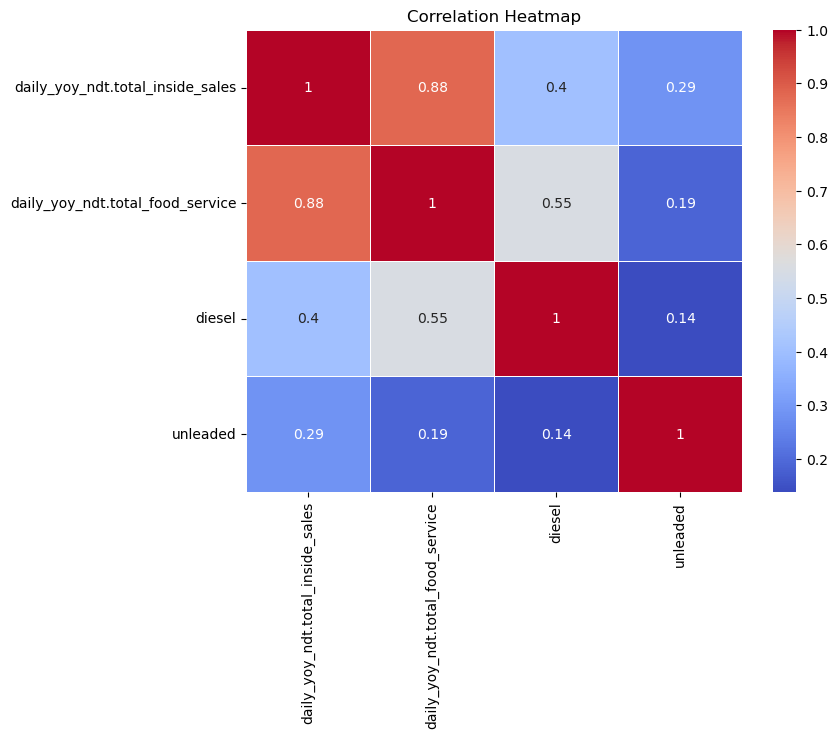

In [17]:
correlation_matrix = timeseries_data[target_var].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We see that there is a strong positive correlation of 0.88 between inside sales and food sales. This suggests that customers who buy in-store items are also likely to purchase food items, and vice versa. These two types of sales seem to go hand in hand.

Additionally, there is a relatively high positive correlation of 0.55 between diesel and food sales, which suggests that an increase in diesel sales is associated with increased food sales. Conversely, the correlation between unleaded sales and food sales is much lower at 0.19, indicating a weaker connection between these two variables.

The correlation matrix does not reveal any negative correlations among the variables, implying that there are no clear inverse relationships between any two variables in the dataset.

## Trends of Sales metrics over the years

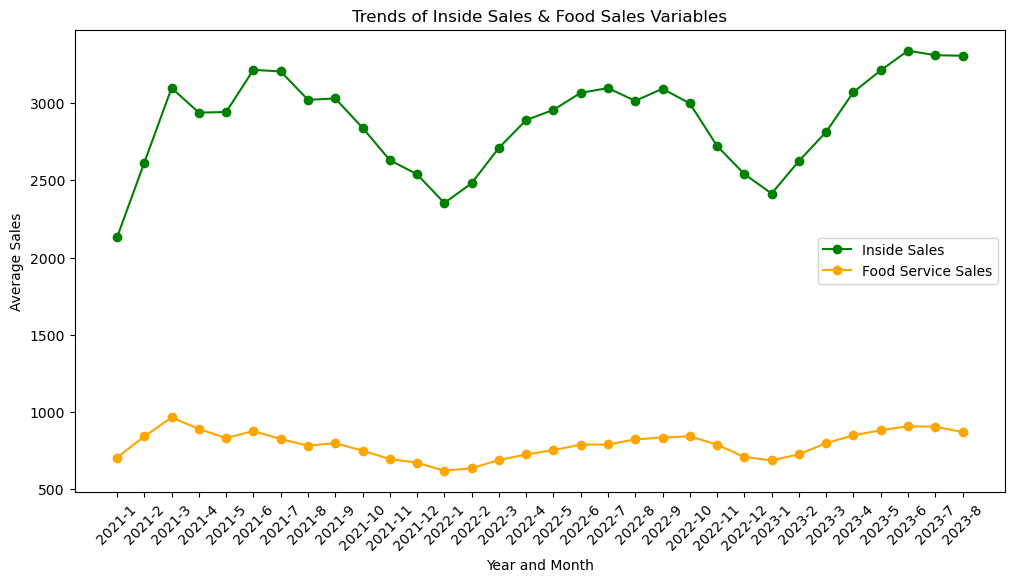

In [18]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
timeseries_data['Year'] = timeseries_data['calendar.calendar_day_date'].dt.year
timeseries_data['Month'] = timeseries_data['calendar.calendar_day_date'].dt.month
monthly_sales = timeseries_data.groupby(['Year', 'Month'])[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['daily_yoy_ndt.total_inside_sales'], label='Inside Sales', marker='o', color='green')
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['daily_yoy_ndt.total_food_service'], label='Food Service Sales', marker='o', color='orange')

plt.xlabel('Year and Month')
plt.ylabel('Average Sales')
plt.title('Trends of Inside Sales & Food Sales Variables')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()

When we observe the pattern of inside sales it reveals a clear seasonality in the data. During the first half of the year, sales show a gradual upward trend. However, from August to the end of the year, a noticeable decline in sales can be observed. This pattern suggests that inside sales tend to peak in the earlier months of the year and gradually decrease in the latter half.

In contrast, food service sales exhibit a different seasonal trend. With the exception of 2021, sales generally show an upward trajectory from the beginning of the year and peak during the middle of the year. After reaching their peak, food service sales begin to decline from September through the end of the year.

Both inside sales and food service sales share a common trend, with a drop in sales occurring from September to the end of the year. 

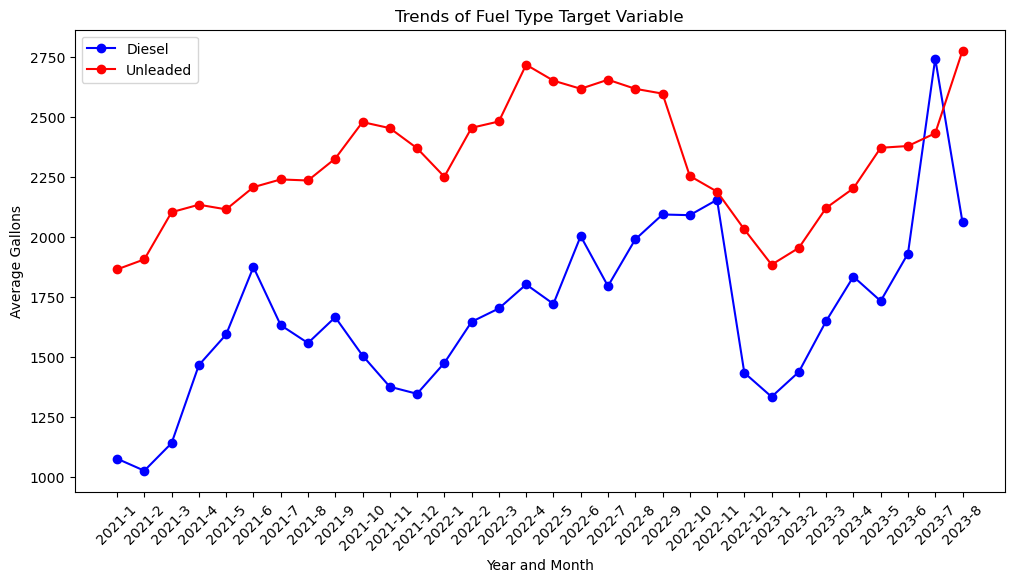

In [19]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
timeseries_data['Year'] = timeseries_data['calendar.calendar_day_date'].dt.year
timeseries_data['Month'] = timeseries_data['calendar.calendar_day_date'].dt.month
monthly_sales = timeseries_data.groupby(['Year', 'Month'])[['diesel', 'unleaded']].mean().reset_index()


plt.figure(figsize=(12, 6))

plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['diesel'], label='Diesel', marker='o', color='blue')
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['unleaded'], label='Unleaded', marker='o', color='red')

plt.xlabel('Year and Month')
plt.ylabel('Average Gallons')
plt.title('Trends of Fuel Type Target Variable')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()

An evident decline in diesel sales is noticeable from October 22 to November 22. Further analysis is needed to comprehend the reasons behind this decrease. This drop might be due to specific events, particular store locations, or opening/closing stores. Investigating this dip is essential for uncovering the potential influencers of diesel sales during this time frame.


A captivating finding is a significant surge in diesel sales from May 23 to June 23. Further analysis is required to elucidate the factors contributing to this sudden upswing in sales. Identifying the specific drivers behind this increase will provide valuable insights into the fluctuations in diesel sales during this period.

Similar to other target variables, both diesel and unleaded sales exhibit a decline from September to year-end. This shared trend among various sales metrics during this period might be seasonal shifts.

## Yearly sales for each category

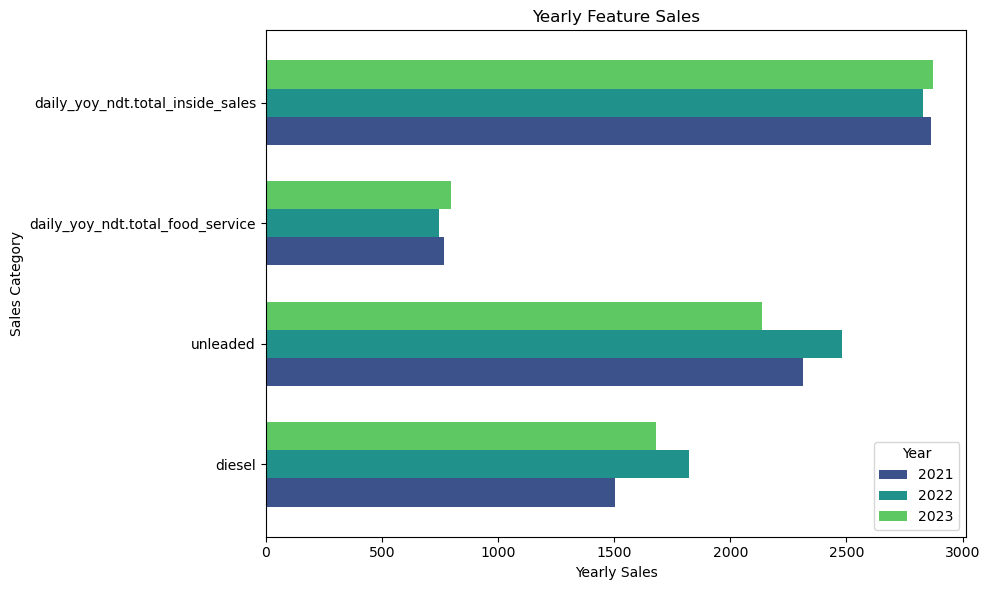

In [20]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
timeseries_data['Year'] = timeseries_data['calendar.calendar_day_date'].dt.year
columns_to_aggregate = ['diesel', 'unleaded', 'daily_yoy_ndt.total_food_service', 'daily_yoy_ndt.total_inside_sales']
yearly_sales = timeseries_data.groupby('Year')[columns_to_aggregate].mean()
yearly_sales = yearly_sales.transpose()
years = timeseries_data['Year'].unique()
colormap = sns.color_palette('viridis', len(years))
ax = yearly_sales.plot(kind='barh', figsize=(10, 6), width=0.7, color=colormap)
ax.set_xlabel('Yearly Sales')
ax.set_ylabel('Sales Category')
ax.set_title('Yearly Feature Sales')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Inside sales consistently emerge as the top revenue generator, emphasizing the significance of in-store purchases as the primary income source for the business.

Unleaded fuel sales consistently secure the second position in revenue generation, indicating that vehicle fuel purchases, particularly unleaded fuel, play a significant role in the overall sales. 

On the contrary, food sales consistently exhibit comparatively lower revenue performance. The lower revenue from food sales suggests potential room for improvement in this area.

An interesting observation in the data pertains to the sales performance of unleaded fuel in 2022 and 2023. During these years, unleaded fuel surpasses diesel in terms of sales. Also, it is important to note that both unleaded and diesel sales experience a decline in 2023.

## Quaterly average sales for each target variable

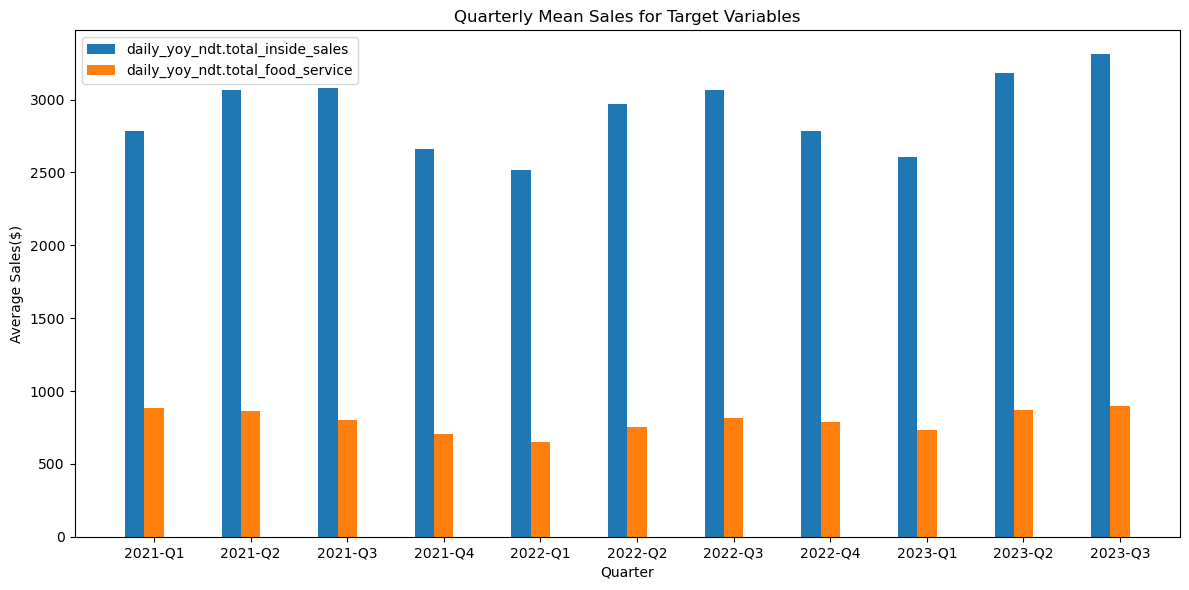

In [21]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
timeseries_data['quarter'] = timeseries_data['calendar.calendar_day_date'].dt.to_period('Q')
target_variables = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']
quarterly_mean_sales = timeseries_data.groupby('quarter')[target_variables].mean()
bar_width = 0.2
index = np.arange(len(quarterly_mean_sales.index))
colors = ['#4A90E2', '#59C1D7']
plt.figure(figsize=(12, 6))
for i, variable in enumerate(target_variables):
    x = index + i * bar_width
    plt.bar(x, quarterly_mean_sales[variable], bar_width, label=variable)
plt.title('Quarterly Mean Sales for Target Variables')
plt.xlabel('Quarter')
plt.ylabel('Average Sales($)')
plt.xticks(index + bar_width * (len(target_variables) / 2), quarterly_mean_sales.index.strftime('%Y-Q%q'))
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show() 

A notable trend in the data is the consistent rise in both inside sales and food sales during the second (Q2) and third (Q3) quarters across all years. These quarters seem to be the peak seasons for inside and food sales.

In 2021, there is a distinct pattern in the food sales data. Sales decrease steadily from the first quarter (Q1) to the last quarter (Q4). However, there's a significant improvement in the following years, 2022 and 2023. Food sales have rebounded impressively, with increasing sales in each quarter, except for a slight dip in 2022 Q4.

When we observe the inside sales data, a consistent upward trend is observed, with sales gradually increasing in each quarter except for the final quarter (Q4) for all the years. This trend suggests that inside sales are steadily growing throughout the year, with Q4 being the exception which is not bad since Q4 in general has less sales overall for past few years.

The data for 2023 reveals a positive trend for Maverik, particularly concerning inside sales and food sales. This trend indicates that 2023 stands out as a successful year for the company in terms of these key performance metrics. The data reflects growth throughout the year across all three quarters.Though there might be a dip in 2023 Q4 based on seasonality, the average sales seems to higher this year.

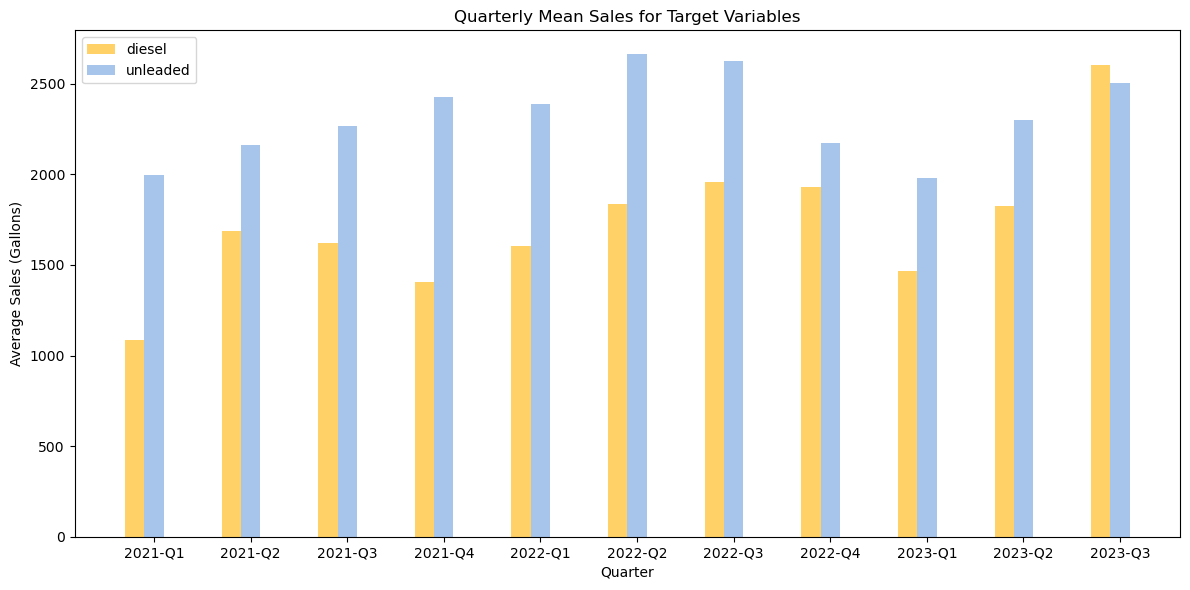

In [22]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
timeseries_data['quarter'] = timeseries_data['calendar.calendar_day_date'].dt.to_period('Q')
target_variables = ['diesel', 'unleaded']
quarterly_mean_sales = timeseries_data.groupby('quarter')[target_variables].mean()
bar_width = 0.2
index = np.arange(len(quarterly_mean_sales.index))
colors = ['#FFD166', '#A7C5EB']
plt.figure(figsize=(12, 6))
for i, variable in enumerate(target_variables):
    x = index + i * bar_width
    plt.bar(x, quarterly_mean_sales[variable], bar_width, label=variable, color=colors[i])

plt.title('Quarterly Mean Sales for Target Variables')
plt.xlabel('Quarter')
plt.ylabel('Average Sales (Gallons)')
plt.xticks(index + bar_width * (len(target_variables) / 2), quarterly_mean_sales.index.strftime('%Y-Q%q'))
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

This quarterly sales analysis reveals intricate patterns within the fuel sales data. In the second quarter (Q2) of 2022, there was a substantial surge in unleaded fuel sales, followed by a subsequent decline in the third quarter (Q3). However, the data illustrates a remarkable resurgence in unleaded fuel sales in the following year, notably in the third quarter of 2023 (2023 Q3), though it has been increasing since the beginning of the year 2023.

Suprisingly, for the year 2021, the unleaded sales didn't go down in Q4 which is generally the season for less sales.

Turning our attention to diesel fuel sales, the data portrays a distinct trend. The zenith of diesel sales occurs in the third quarter of 2023 (2023 Q3), signifying a noteworthy shift in consumer behavior and market dynamics. The diesel sales have outperformed unleaded in Q3.

For year 2023, we see both unleaded and diesel has been constantly growing over each quarter in the year. 

## Overall Monthly trend for all the 3 years

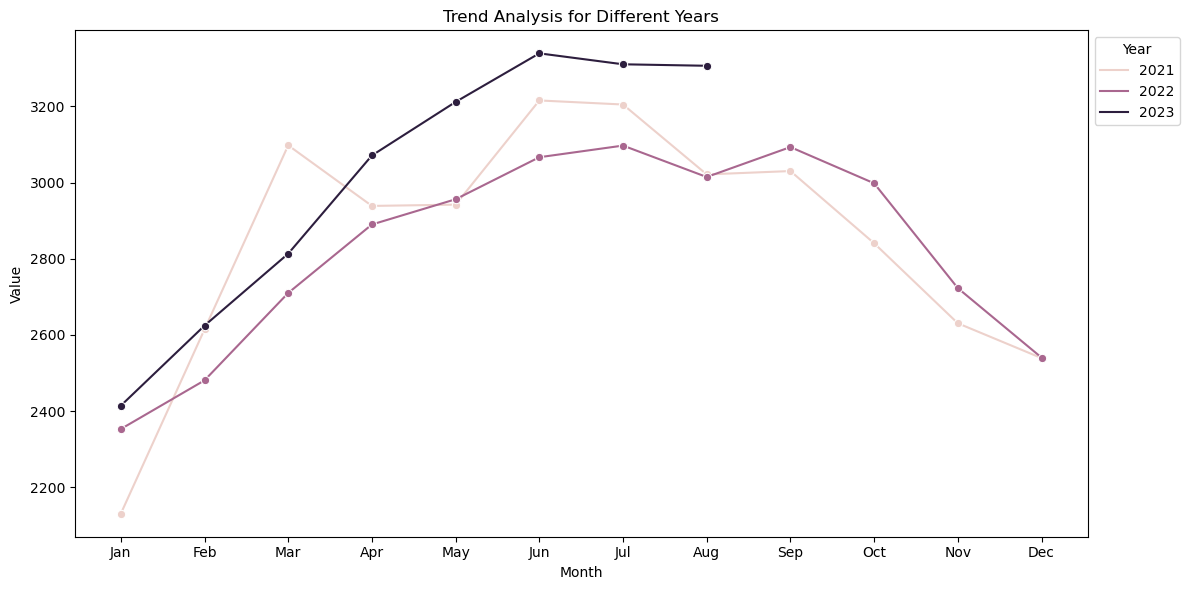

In [23]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
timeseries_data['Year'] = timeseries_data['calendar.calendar_day_date'].dt.year
timeseries_data['Month'] = timeseries_data['calendar.calendar_day_date'].dt.month
target_column = 'daily_yoy_ndt.total_inside_sales'
monthly_average_sales = timeseries_data.groupby(['Year', 'Month'])[target_column].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_average_sales, x='Month', y=target_column, hue='Year', marker='o')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Trend Analysis for Different Years')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), months)
plt.tight_layout()
plt.grid(False)
plt.show()

In 2022 and 2023, there has been a consistent growth, indicating a positive trajectory. However, in 2021, sales exhibited significant fluctuations with a noticeable decline from September onwards. Based on this seasonality, we might have a similar trend of drop in sales for 2023 as well from september.

June and July consistently emerged as the highest-selling months over the three-year period. Understanding the drivers behind this seasonality can help tailor marketing and sales strategies to capitalize on these peak months. 

A remarkable observation is the substantial sales spike from January to March 2021. This surge needs a deeper analysis to identify its root causes, whether they be marketing initiatives, promotions, special events, or opening new stores.

## Monthly average sales for each target variable over the span of three years

In [24]:
def time_features(timeseries_data):
    timeseries_data1 = timeseries_data.copy()  # Create a copy of the DataFrame
    timeseries_data1['date'] = pd.to_datetime(timeseries_data1['calendar.calendar_day_date'])
    timeseries_data1['dayofweek'] = timeseries_data1['date'].dt.dayofweek
    timeseries_data1['quarter'] = timeseries_data1['date'].dt.quarter
    timeseries_data1['month'] = timeseries_data1['date'].dt.month
    timeseries_data1['year'] = timeseries_data1['date'].dt.year
    timeseries_data1['dayofyear'] = timeseries_data1['date'].dt.dayofyear
    timeseries_data1['dayofmonth'] = timeseries_data1['date'].dt.day

    return timeseries_data1

timeseries_data1 = time_features(timeseries_data)

## Average sales for target variables - Weekday VS Weekend 

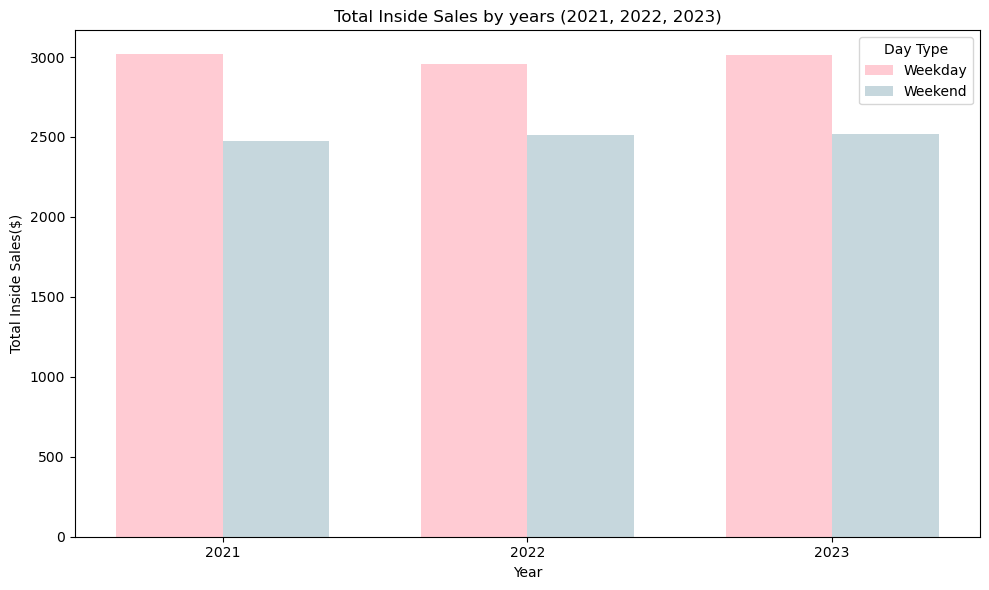

In [26]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])

years = [2021, 2022, 2023]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Total Inside Sales by years (2021, 2022, 2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Inside Sales($)')
weekend_sales = []
weekday_sales = []
for year in years:
    yearly_data = timeseries_data[timeseries_data['calendar.calendar_day_date'].dt.year == year]
    yearly_data['day_of_week'] = yearly_data['calendar.calendar_day_date'].dt.dayofweek
    weekend_data = yearly_data[(yearly_data['day_of_week'] == 5) | (yearly_data['day_of_week'] == 6)]['daily_yoy_ndt.total_inside_sales'].mean()
    weekday_data = yearly_data[(yearly_data['day_of_week'] >= 0) & (yearly_data['day_of_week'] <= 4)]['daily_yoy_ndt.total_inside_sales'].mean()
    weekday_sales.append(weekday_data)  
    weekend_sales.append(weekend_data)  
width = 0.35
x = np.arange(len(years))
ax.bar(x - width/2, weekday_sales, width, label='Weekday', color='#FFB6C1', alpha=0.7)
ax.bar(x + width/2, weekend_sales, width, label='Weekend', color='#AEC6CF', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(title='Day Type')
ax.grid(False)
plt.tight_layout()
plt.show()

The analysis of sales patterns reveals that there's a remarkable level of consistency between weekday and weekend sales, particularly for Inside Sales. While there is a decrease in sales during the weekend when compared to the weekday figures, this decline is not very huge. On an average, sales are about 16% lower on weekends than on weekdays.

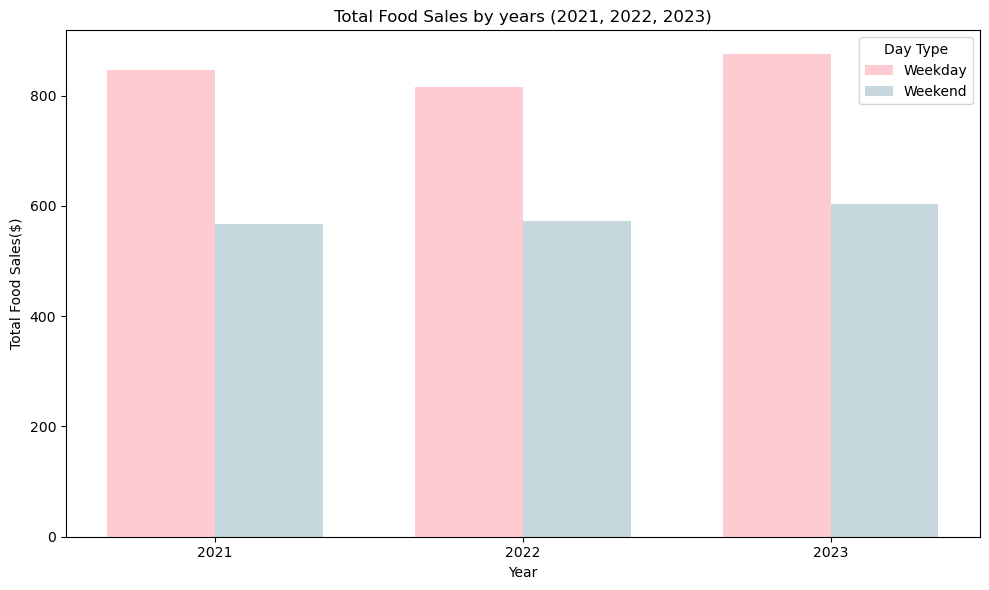

In [27]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
years = [2021, 2022, 2023]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Total Food Sales by years (2021, 2022, 2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Food Sales($)')
weekend_sales = []
weekday_sales = []
for year in years:
    yearly_data = timeseries_data[timeseries_data['calendar.calendar_day_date'].dt.year == year]
    yearly_data['day_of_week'] = yearly_data['calendar.calendar_day_date'].dt.dayofweek
    weekend_data = yearly_data[(yearly_data['day_of_week'] == 5) | (yearly_data['day_of_week'] == 6)]['daily_yoy_ndt.total_food_service'].mean()
    weekday_data = yearly_data[(yearly_data['day_of_week'] >= 0) & (yearly_data['day_of_week'] <= 4)]['daily_yoy_ndt.total_food_service'].mean()
    weekday_sales.append(weekday_data)  
    weekend_sales.append(weekend_data)  
width = 0.35
x = np.arange(len(years))
ax.bar(x - width/2, weekday_sales, width, label='Weekday', color='#FFB6C1', alpha=0.7)
ax.bar(x + width/2, weekend_sales, width, label='Weekend', color='#AEC6CF', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(title='Day Type')
ax.grid(False)
plt.tight_layout()
plt.show()

The analysis reveals a consistent pattern of food sales dropping during the weekends, with a percentage drop of approximately 25%. This suggests that there is a noticeable decline in food sales when transitioning from weekdays to weekends across the three-year period. This decline appears to be a stable trend over the course of the study.

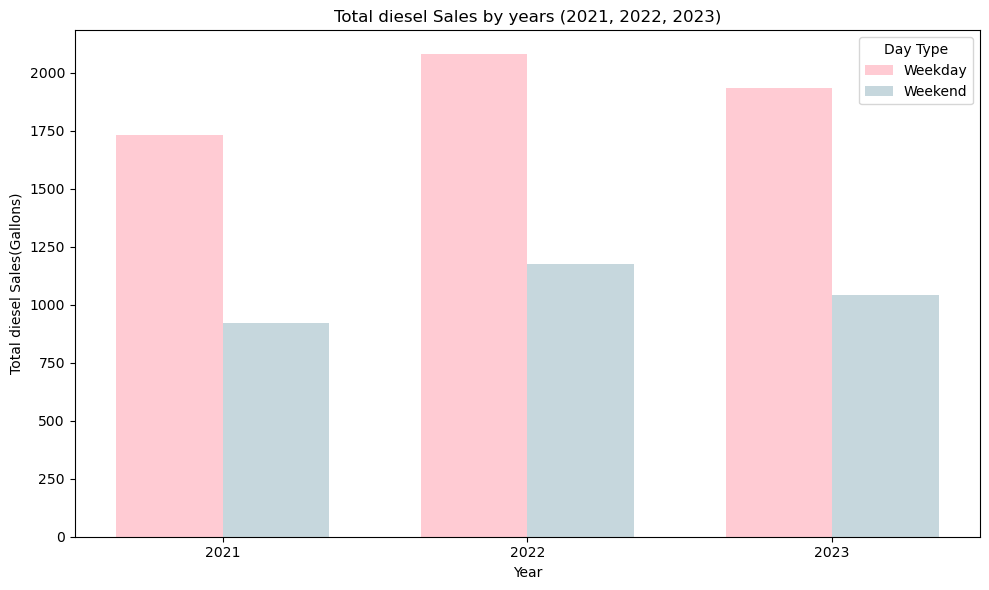

In [28]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
years = [2021, 2022, 2023]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Total diesel Sales by years (2021, 2022, 2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Total diesel Sales(Gallons)')
weekend_sales = []
weekday_sales = []
for year in years:
    yearly_data = timeseries_data[timeseries_data['calendar.calendar_day_date'].dt.year == year]
    yearly_data['day_of_week'] = yearly_data['calendar.calendar_day_date'].dt.dayofweek
    weekend_data = yearly_data[(yearly_data['day_of_week'] == 5) | (yearly_data['day_of_week'] == 6)]['diesel'].mean()
    weekday_data = yearly_data[(yearly_data['day_of_week'] >= 0) & (yearly_data['day_of_week'] <= 4)]['diesel'].mean()
    weekday_sales.append(weekday_data)  
    weekend_sales.append(weekend_data) 
width = 0.35
x = np.arange(len(years))
ax.bar(x - width/2, weekday_sales, width, label='Weekday', color='#FFB6C1', alpha=0.7)
ax.bar(x + width/2, weekend_sales, width, label='Weekend', color='#AEC6CF', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(title='Day Type')
ax.grid(False)
plt.tight_layout()
plt.show()

Diesel sales experience a significant decline during weekends, with a consistent pattern of nearly 50% lower sales on weekends compared to weekdays across all three years. This observation suggests that the demand for diesel fuel is notably higher on weekdays, possibly due to increased commercial and industrial activities, as well as commuting during the workweek. 

Additionally, a comparative analysis of weekday and weekend sales across all target sales variables reveals that Diesel consistently exhibits the lowest sales performance during the weekend, in contrast to the other variables.

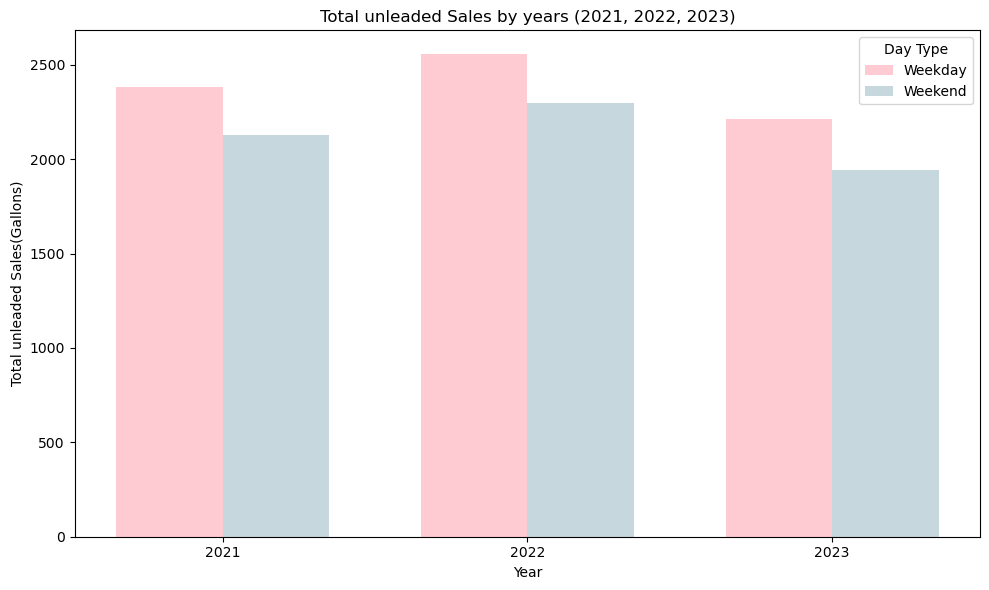

In [29]:
timeseries_data['calendar.calendar_day_date'] = pd.to_datetime(timeseries_data['calendar.calendar_day_date'])
years = [2021, 2022, 2023]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Total unleaded Sales by years (2021, 2022, 2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Total unleaded Sales(Gallons)')
weekend_sales = []
weekday_sales = []
for year in years:
    yearly_data = timeseries_data[timeseries_data['calendar.calendar_day_date'].dt.year == year]
    yearly_data['day_of_week'] = yearly_data['calendar.calendar_day_date'].dt.dayofweek
    weekend_data = yearly_data[(yearly_data['day_of_week'] == 5) | (yearly_data['day_of_week'] == 6)]['unleaded'].mean()
    weekday_data = yearly_data[(yearly_data['day_of_week'] >= 0) & (yearly_data['day_of_week'] <= 4)]['unleaded'].mean()
    weekday_sales.append(weekday_data)  
    weekend_sales.append(weekend_data)  
width = 0.35
x = np.arange(len(years))
ax.bar(x - width/2, weekday_sales, width, label='Weekday', color='#FFB6C1', alpha=0.7)
ax.bar(x + width/2, weekend_sales, width, label='Weekend', color='#AEC6CF', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(title='Day Type')
ax.grid(False)
plt.tight_layout()
plt.show()

Unleaded sales seem to be the least affected by weekends when compared to the other target sales variables. While there is a decrease in sales during the weekend, it is not as substantial as in other cases. The drop in sales during weekends is around 8% to 9%.

## Average Sales based on day of week, day of month, day of year for all the target variables

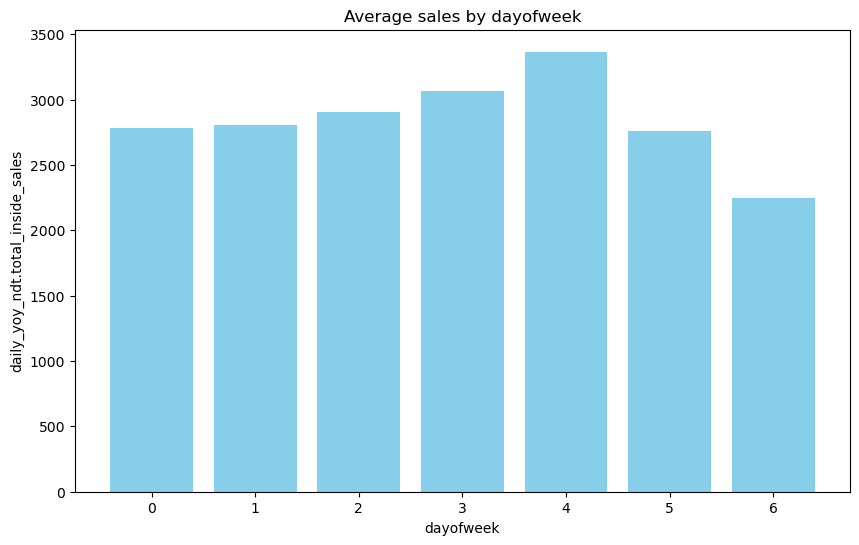

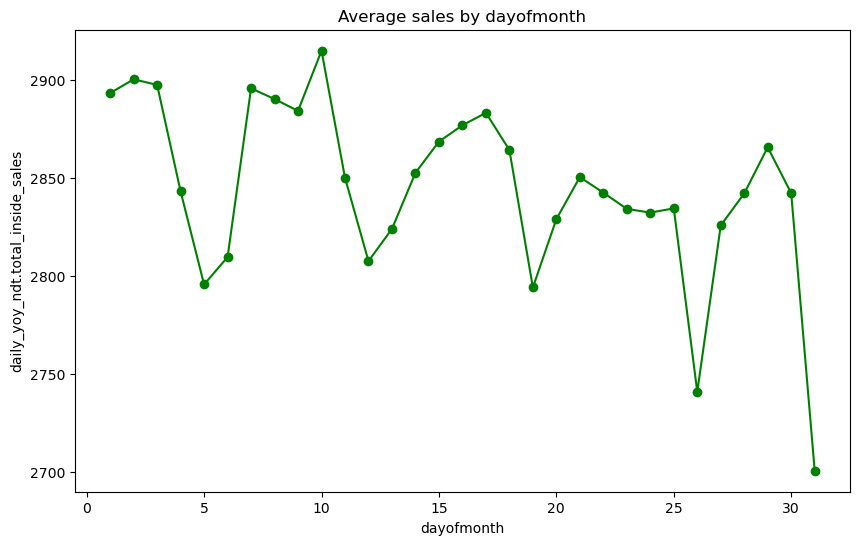

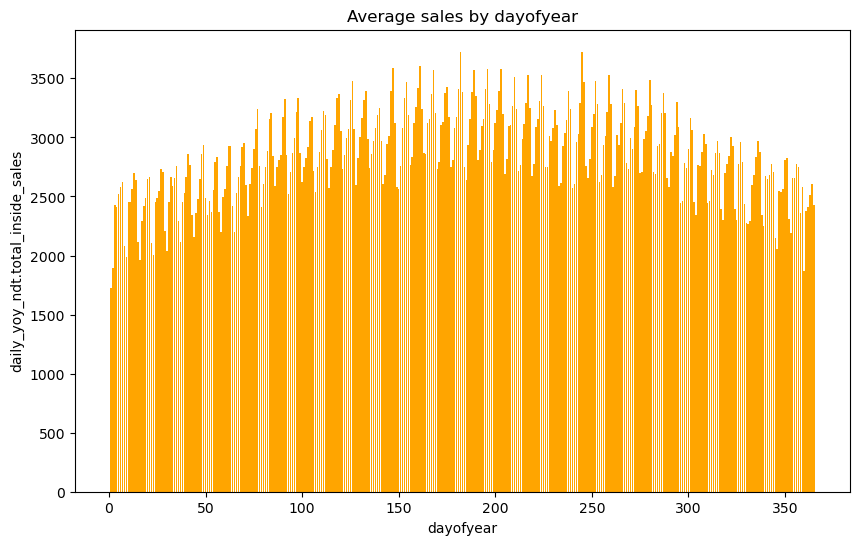

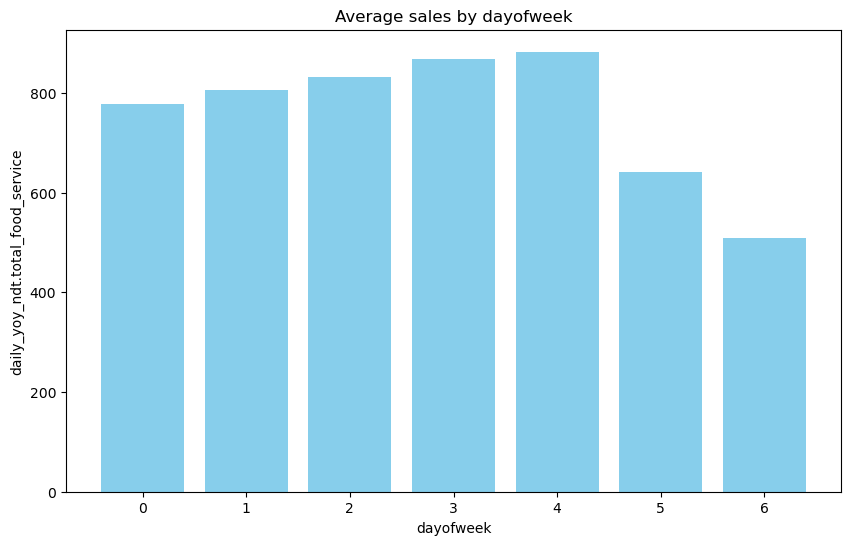

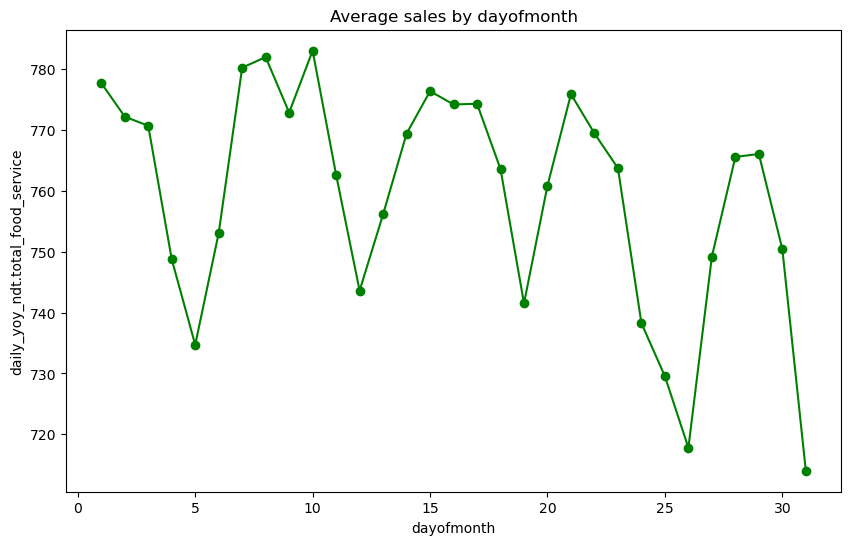

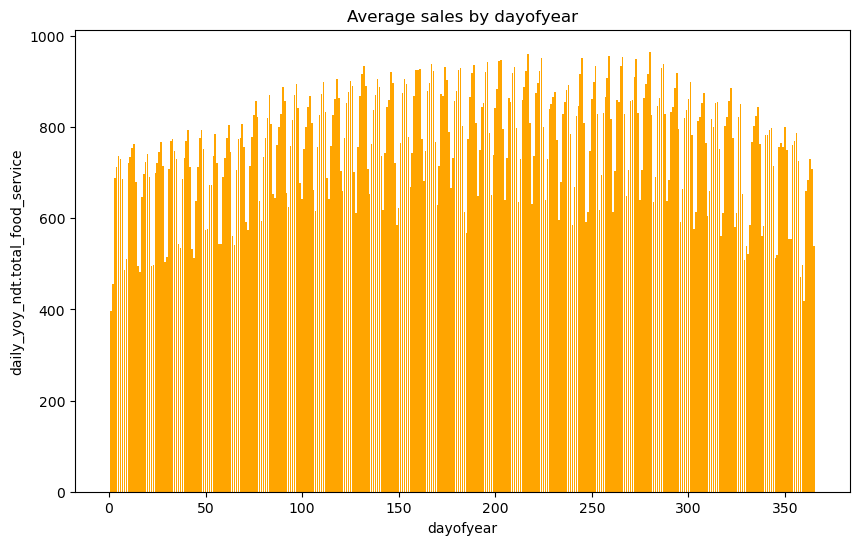

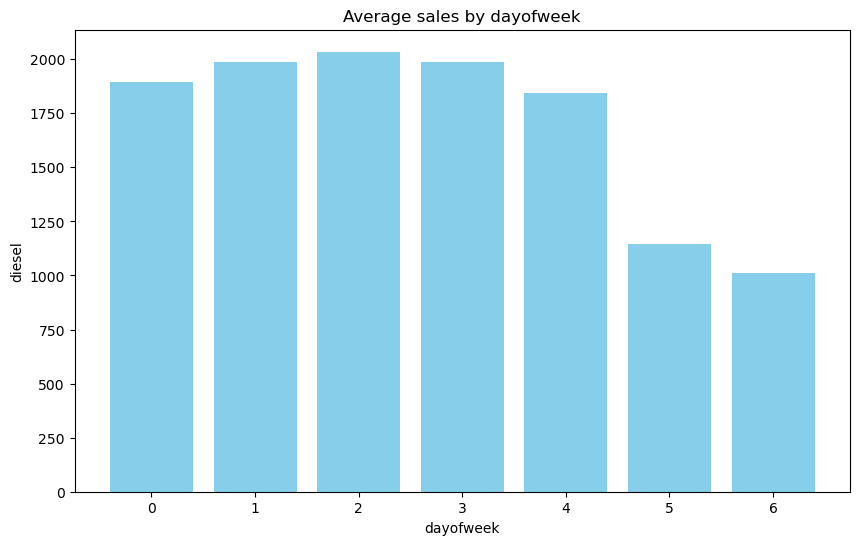

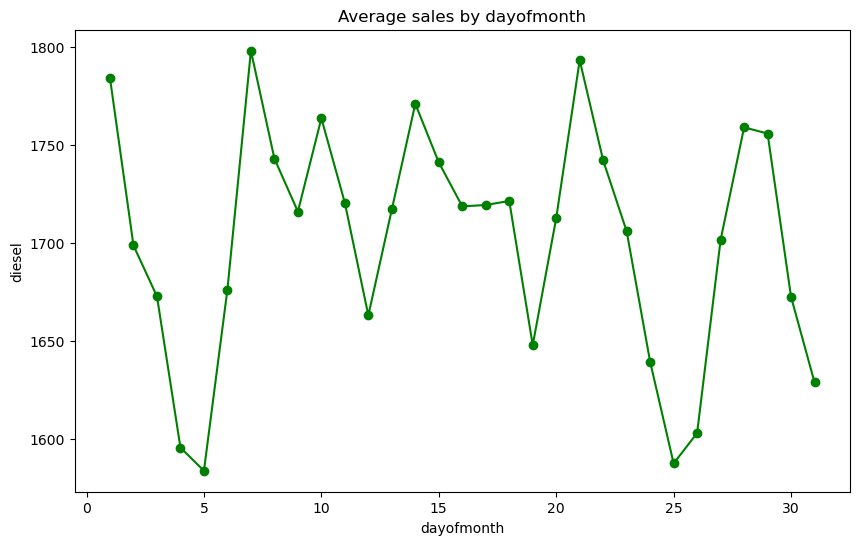

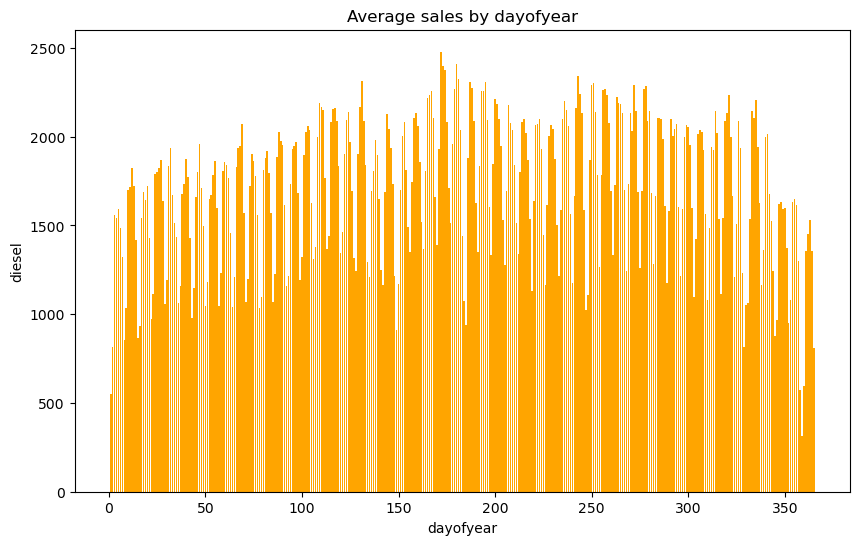

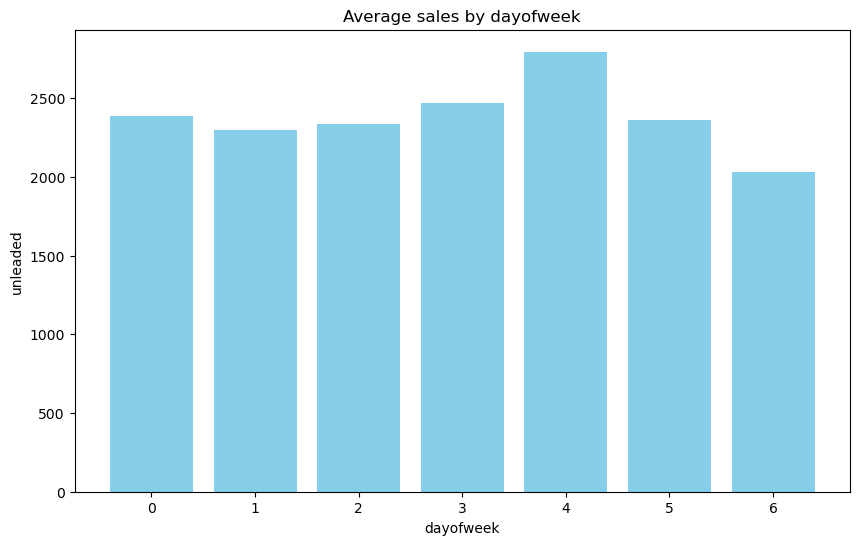

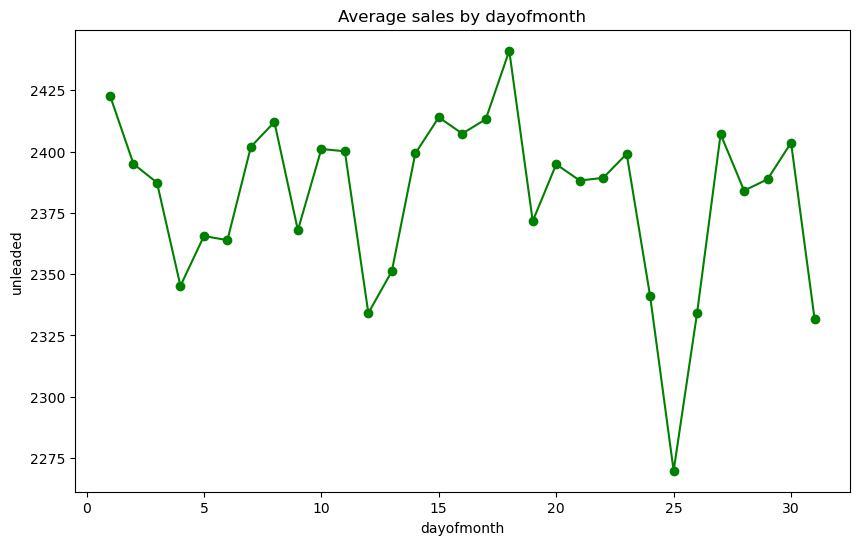

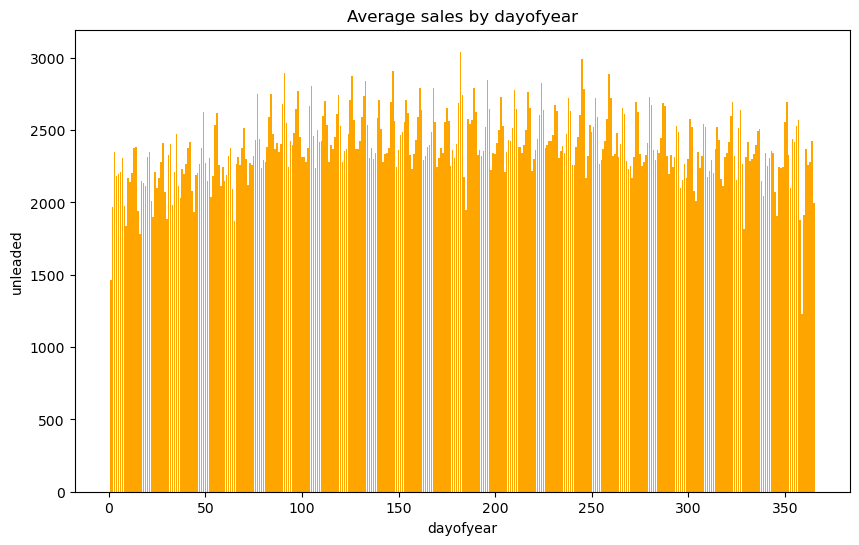

In [30]:
def generate_plot(data, x_col, y_col, title, chart_type="bar", custom_colors="skyblue"):
    plt.figure(figsize=(10, 6))  
    
    if chart_type == "bar":
        plt.bar(data[x_col], data[y_col], color=custom_colors)
    elif chart_type == "line":
        plt.plot(data[x_col], data[y_col], marker='o', color=custom_colors)
    
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(False)
    plt.show()


dayofweek_colors = "skyblue"
dayofmonth_colors = "green"
dayofyear_colors = "orange"

generate_plot(timeseries_data1.groupby('dayofweek').agg({"daily_yoy_ndt.total_inside_sales": "mean"}).reset_index(), 'dayofweek', 'daily_yoy_ndt.total_inside_sales', 'Average sales by dayofweek', chart_type="bar", custom_colors=dayofweek_colors)
generate_plot(timeseries_data1.groupby('dayofmonth').agg({"daily_yoy_ndt.total_inside_sales": "mean"}).reset_index(), 'dayofmonth', 'daily_yoy_ndt.total_inside_sales', 'Average sales by dayofmonth', chart_type="line", custom_colors=dayofmonth_colors)
generate_plot(timeseries_data1.groupby('dayofyear').agg({"daily_yoy_ndt.total_inside_sales": "mean"}).reset_index(), 'dayofyear', 'daily_yoy_ndt.total_inside_sales', 'Average sales by dayofyear', chart_type="bar", custom_colors=dayofyear_colors)

generate_plot(timeseries_data1.groupby('dayofweek').agg({"daily_yoy_ndt.total_food_service": "mean"}).reset_index(), 'dayofweek', 'daily_yoy_ndt.total_food_service', 'Average sales by dayofweek', chart_type="bar", custom_colors=dayofweek_colors)
generate_plot(timeseries_data1.groupby('dayofmonth').agg({"daily_yoy_ndt.total_food_service": "mean"}).reset_index(), 'dayofmonth', 'daily_yoy_ndt.total_food_service', 'Average sales by dayofmonth', chart_type="line", custom_colors=dayofmonth_colors)
generate_plot(timeseries_data1.groupby('dayofyear').agg({"daily_yoy_ndt.total_food_service": "mean"}).reset_index(), 'dayofyear', 'daily_yoy_ndt.total_food_service', 'Average sales by dayofyear', chart_type="bar", custom_colors=dayofyear_colors)

generate_plot(timeseries_data1.groupby('dayofweek').agg({"diesel": "mean"}).reset_index(), 'dayofweek', 'diesel', 'Average sales by dayofweek', chart_type="bar", custom_colors=dayofweek_colors)
generate_plot(timeseries_data1.groupby('dayofmonth').agg({"diesel": "mean"}).reset_index(), 'dayofmonth', 'diesel', 'Average sales by dayofmonth', chart_type="line", custom_colors=dayofmonth_colors)
generate_plot(timeseries_data1.groupby('dayofyear').agg({"diesel": "mean"}).reset_index(), 'dayofyear', 'diesel', 'Average sales by dayofyear', chart_type="bar", custom_colors=dayofyear_colors)

generate_plot(timeseries_data1.groupby('dayofweek').agg({"unleaded": "mean"}).reset_index(), 'dayofweek', 'unleaded', 'Average sales by dayofweek', chart_type="bar", custom_colors=dayofweek_colors)
generate_plot(timeseries_data1.groupby('dayofmonth').agg({"unleaded": "mean"}).reset_index(), 'dayofmonth', 'unleaded', 'Average sales by dayofmonth', chart_type="line", custom_colors=dayofmonth_colors)
generate_plot(timeseries_data1.groupby('dayofyear').agg({"unleaded": "mean"}).reset_index(), 'dayofyear', 'unleaded', 'Average sales by dayofyear', chart_type="bar", custom_colors=dayofyear_colors)

In the analysis of sales across different days of the week, we observe that "Friday" consistently emerges as the day with the highest sales for all the target variables, except for Diesel. In the case of Diesel, it's interesting to note that Wednesday registers the highest sales.

Further exploration reveals a monthly trend, where the 1st day of each month consistently marks a robust start for sales, often ranking among the highest sales days within that respective month. Conversely, we notice the lowest sales at the start of the last week of each month.

Expanding our perspective over the course of a year, we identify a recurring pattern in which the least sales occur during the initial days of the last week of December. This seasonality might be due to the holiday season.

## Average sales for all the target variables during each of the holidays

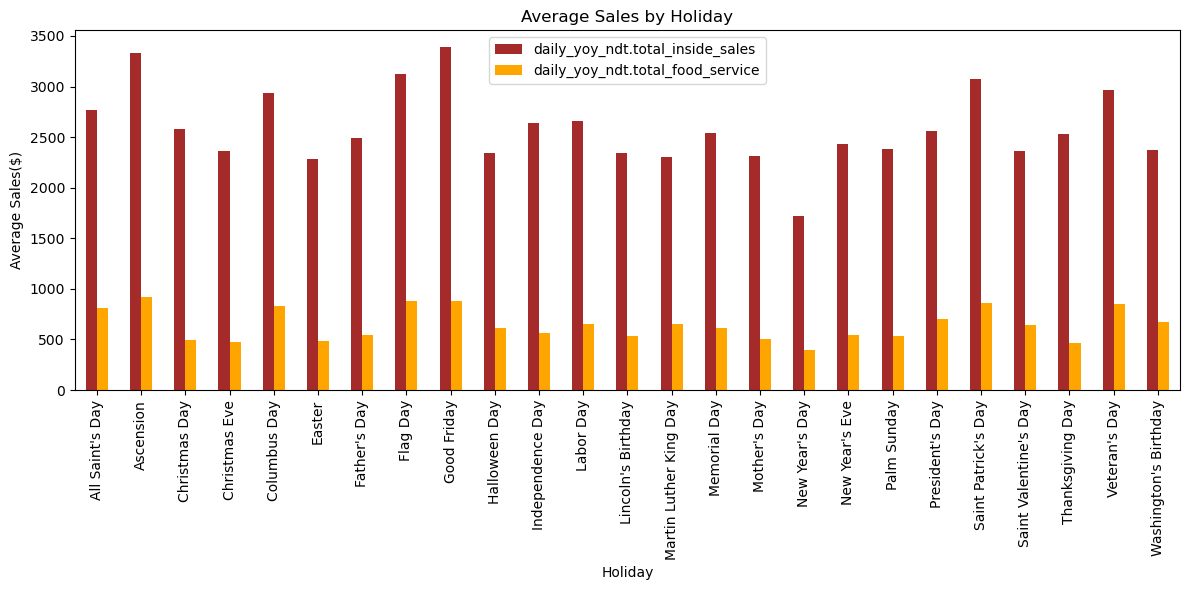

In [31]:
target_var_1 = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']
avg_sales_by_holiday = timeseries_data.groupby('calendar_information.holiday')[target_var_1].mean().reset_index()
avg_sales_by_holiday_filtered = avg_sales_by_holiday[avg_sales_by_holiday['calendar_information.holiday'].str.upper() != 'NONE']
data = avg_sales_by_holiday_filtered.set_index('calendar_information.holiday')[target_var_1]
colors = ['brown', 'orange']  
ax = data.plot(kind='bar', stacked=False, figsize=(12, 6), color=colors)  
ax.set_xlabel('Holiday')
ax.set_ylabel('Average Sales($)')
ax.set_title('Average Sales by Holiday')
plt.tight_layout()
plt.show()

When looking the impact of various holidays on average sales, we observe some interesting patterns. Ascension day and Good Friday holidays consistently yield the highest average inside sales, while New Year's registers the lowest average sales in this category.

Similarly, for average food sales, we find that Ascension day, Good Friday, Flag day, Saint Patrick's day, and Veteran's day tend to result in higher average sales. On the other hand, New Year's Eve stands out as the holiday with the lowest average food sales. 

Overall, when considering both inside sales and food sales, Ascension day consistently emerges as a holiday associated with high average sales, while New Year's Eve tends to have the lowest average sales.

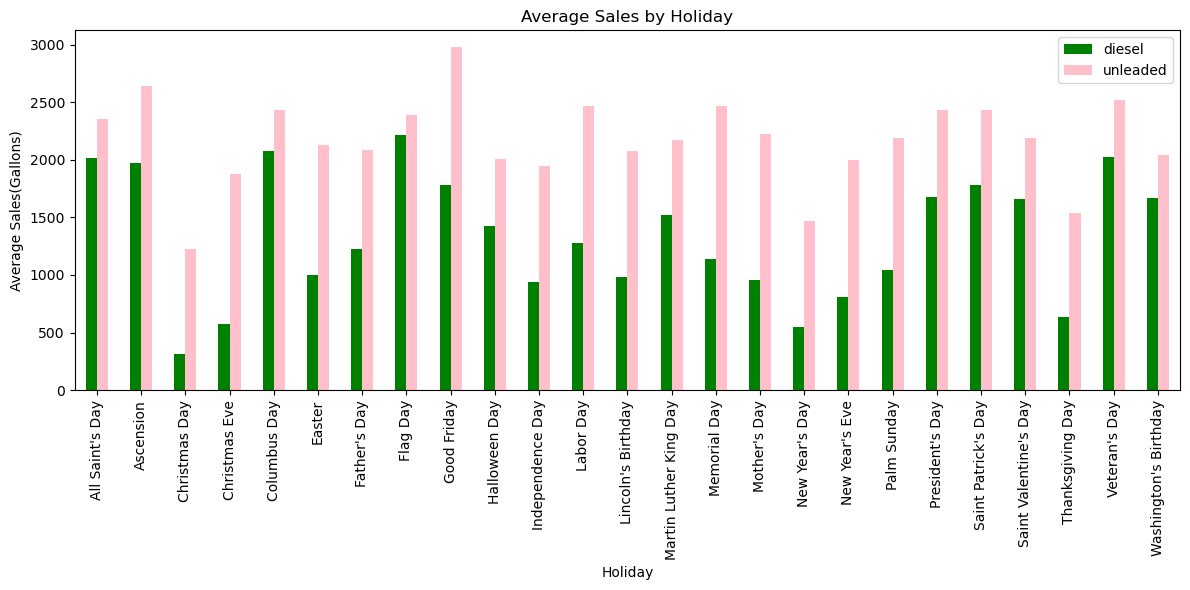

In [32]:
target_var_2 = ['diesel', 'unleaded']
avg_sales_by_holiday = timeseries_data.groupby('calendar_information.holiday')[target_var_2].mean().reset_index()
avg_sales_by_holiday_filtered = avg_sales_by_holiday[avg_sales_by_holiday['calendar_information.holiday'].str.upper() != 'NONE']
data = avg_sales_by_holiday_filtered.set_index('calendar_information.holiday')[target_var_2]
colors = ['green', 'pink']  
ax = data.plot(kind='bar', stacked=False, figsize=(12, 6), color=colors) 
ax.set_xlabel('Holiday')
ax.set_ylabel('Average Sales(Gallons)')
ax.set_title('Average Sales by Holiday')
plt.tight_layout()
plt.show()

Good Friday consistently stands out as the holiday with the highest average sales for unleaded fuel, while Christmas Day consistently records the lowest average sales for this type of fuel. Similarly, Flag Day consistently yields the highest average sales for diesel, with Christmas Day having the lowest average diesel sales.

One intriguing observation is that on Flag Day, both unleaded and diesel fuel show similar average sales figures. This similarity is not as evident for other holidays.

Overall Good Friday and Flag Day consistently yield the highest average sales for unleaded and diesel fuels respectively,

## Sites having more sales for each target variable

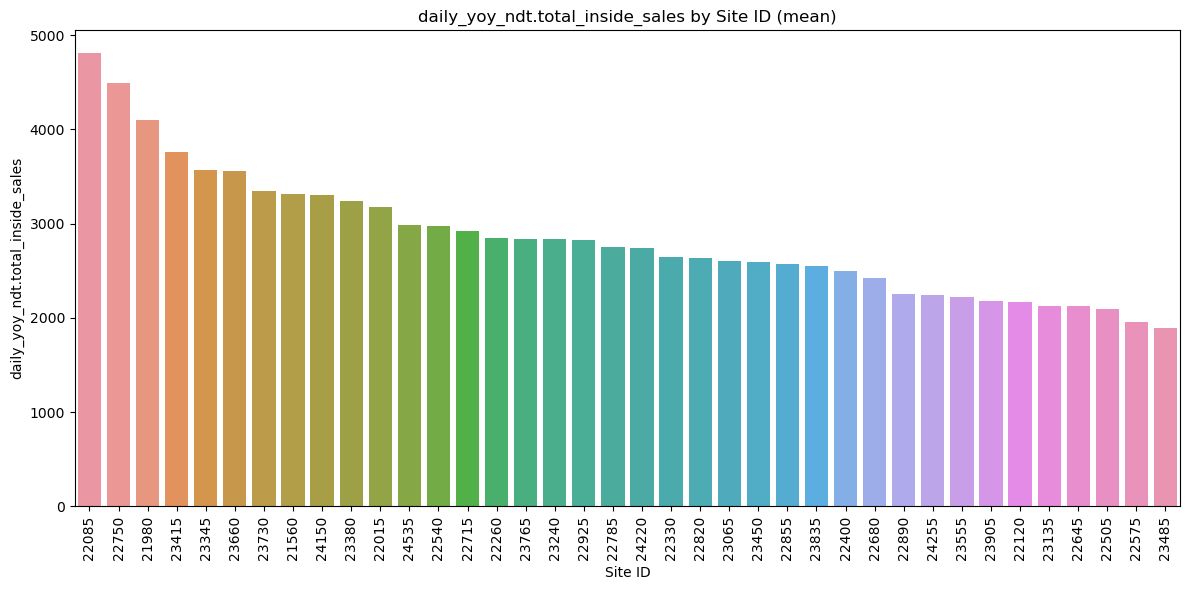

In [33]:
target_variable = 'daily_yoy_ndt.total_inside_sales'  
agg_functions = {
    target_variable: 'mean',
}
target_aggregate = timeseries_data.groupby('site_id_msba')[target_variable].agg(agg_functions[target_variable]).reset_index()
sorted_aggregate = target_aggregate.sort_values(by=target_variable, ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_aggregate, x='site_id_msba', y=target_variable, order=sorted_aggregate['site_id_msba'])
plt.title(f'{target_variable} by Site ID (mean)')
plt.xlabel('Site ID')
plt.ylabel(target_variable)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

The stores with the highest average inside sales are 22085, 22750, 21980, 23425, and 23660, while those with the lowest average sales are 23135, 22645, 22505, 22575, and 23485. It is crucial to conduct further analysis to understand the factors contributing to the varying sales performance of these specific sites. Investigating these high and low-performing stores can provide valuable insights into the strategies and conditions that lead to exceptional or underperforming sales.

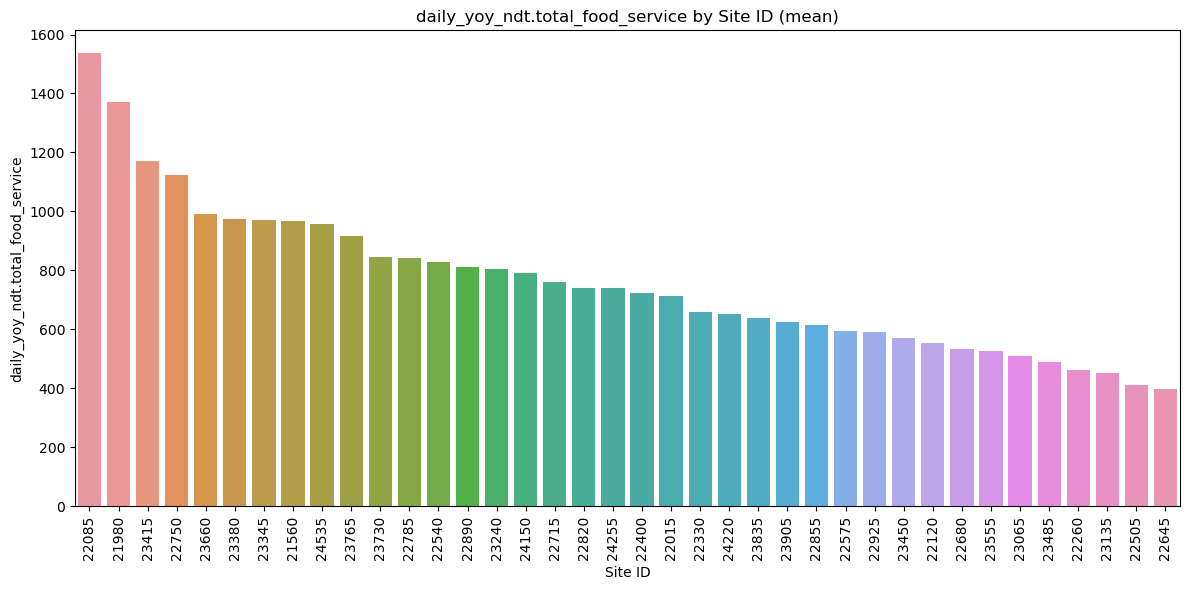

In [34]:
target_variable = 'daily_yoy_ndt.total_food_service'  
agg_functions = {
    target_variable: 'mean',
}
target_aggregate = timeseries_data.groupby('site_id_msba')[target_variable].agg(agg_functions[target_variable]).reset_index()
sorted_aggregate = target_aggregate.sort_values(by=target_variable, ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_aggregate, x='site_id_msba', y=target_variable, order=sorted_aggregate['site_id_msba'])
plt.title(f'{target_variable} by Site ID (mean)')
plt.xlabel('Site ID')
plt.ylabel(target_variable)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

The top five stores with the highest average food sales are 22085, 21980, 23415, 22750, and 23660. Conversely, the five stores with the lowest average food sales are 23485, 22260, 23135, 22505, and 22645. To gain a deeper understanding of the factors contributing to these varying food sales figures, further analysis is essential. 

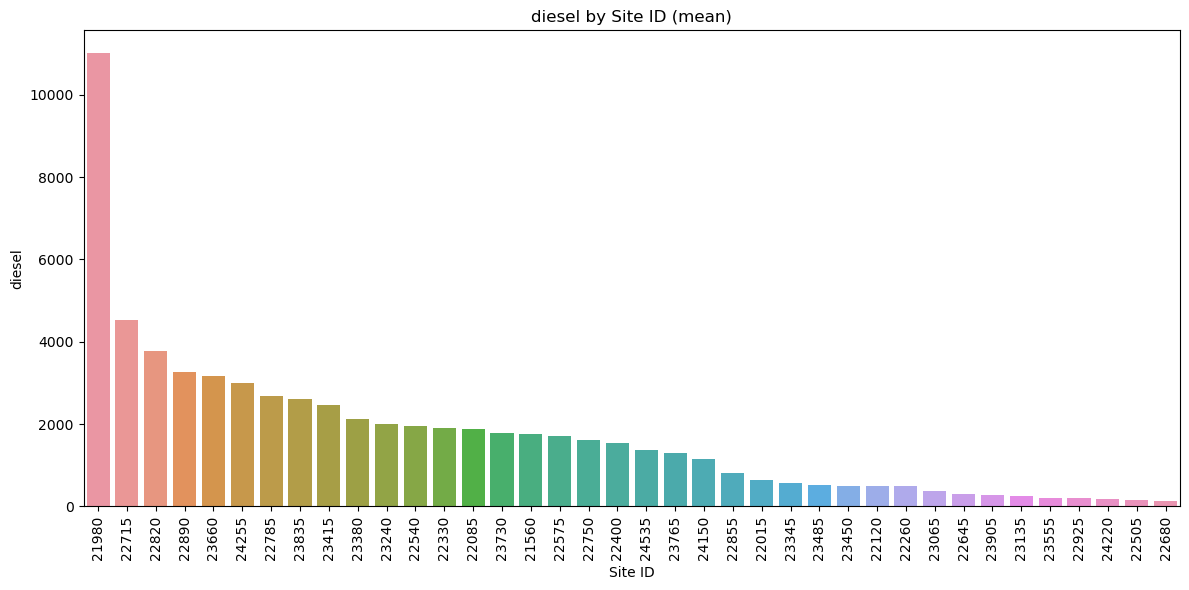

In [35]:
target_variable = 'diesel' 

agg_functions = {
    target_variable: 'mean',
}
target_aggregate = timeseries_data.groupby('site_id_msba')[target_variable].agg(agg_functions[target_variable]).reset_index()
sorted_aggregate = target_aggregate.sort_values(by=target_variable, ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_aggregate, x='site_id_msba', y=target_variable, order=sorted_aggregate['site_id_msba'])
plt.title(f'{target_variable} by Site ID (mean)')
plt.xlabel('Site ID')
plt.ylabel(target_variable)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

The top five stores with the highest diesel sales are 21980, 22715, 22820, 22890, and 23660, while the five stores with the least diesel sales are 22555, 22925, 24220, 22505, and 22680. 

Unlike other sales target variables, diesel sales exhibit a substantial difference between the top-performing and lowest-performing sites.

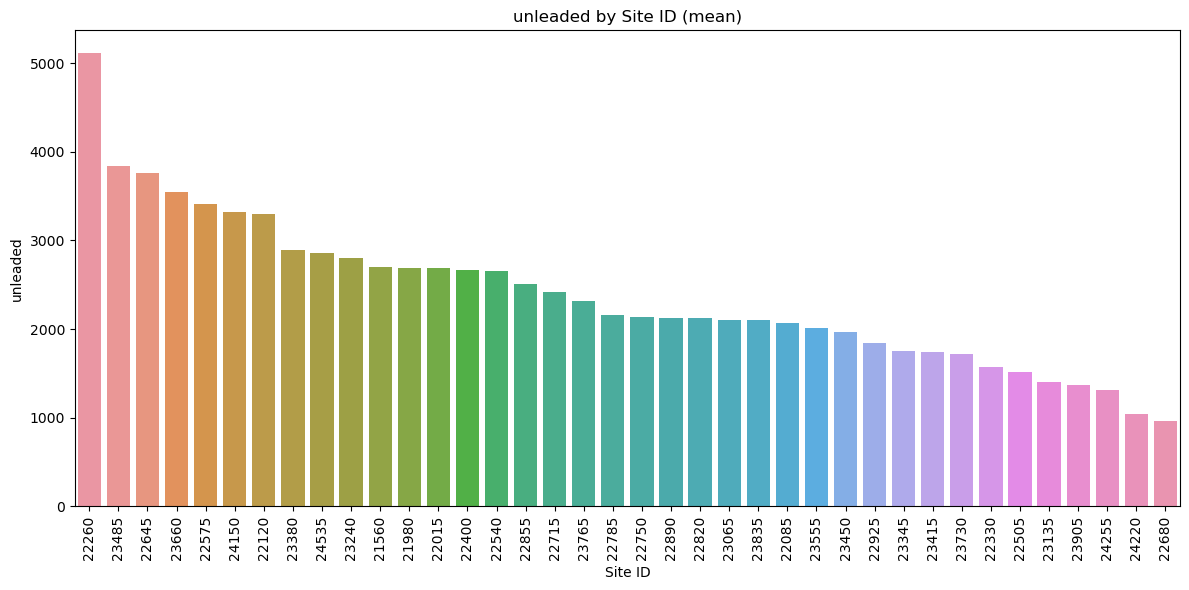

In [36]:
target_variable = 'unleaded'  
agg_functions = {
    target_variable: 'mean',
}
target_aggregate = timeseries_data.groupby('site_id_msba')[target_variable].agg(agg_functions[target_variable]).reset_index()
sorted_aggregate = target_aggregate.sort_values(by=target_variable, ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_aggregate, x='site_id_msba', y=target_variable, order=sorted_aggregate['site_id_msba'])
plt.title(f'{target_variable} by Site ID (mean)')
plt.xlabel('Site ID')
plt.ylabel(target_variable)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

The top five stores with the highest unleaded sales are 22260, 23485, 22645, 23660, and 24150, while the five stores with the lowest unleaded sales are 23135, 23905, 24255, 24220, and 22680. 

#  <a name = "QD"> Qualitative Data</a>

# <a name = "OQ"> Overview</a>

In [37]:
print(qual_data.shape)

(37, 55)


The qualitative data has 37 rows and 55 columns

In [38]:
qual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               37 non-null     int64 
 1   open_year                                37 non-null     int64 
 2   square_feet                              37 non-null     int64 
 3   front_door_count                         37 non-null     int64 
 4   years_since_last_project                 37 non-null     int64 
 5   parking_spaces                           37 non-null     int64 
 6   lottery                                  37 non-null     object
 7   freal                                    37 non-null     object
 8   bonfire_grill                            37 non-null     object
 9   pizza                                    37 non-null     object
 10  cinnabon                                 37 non-null     object


In [39]:
qual_data.head(10)

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,1,2021,5046,2,2,38,Yes,Yes,Yes,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
1,2,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
2,3,2021,5046,2,2,35,Yes,Yes,Yes,Yes,...,5,In-Line,None,No,Yes,3,2,4,1,22015
3,4,2021,5046,2,2,36,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
4,5,2021,5046,2,2,25,Yes,Yes,Yes,No,...,0,NaN,NaN,No,Yes,0,0,0,0,22120
5,6,2021,5046,2,2,38,Yes,Yes,No,No,...,0,NaN,NaN,No,Yes,4,2,4,2,22260
6,7,2021,5046,2,2,36,Yes,Yes,No,No,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22330
7,8,2021,5046,2,1,38,Yes,Yes,Yes,No,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22400
8,9,2021,5046,2,2,41,Yes,Yes,No,No,...,0,NaN,NaN,No,Yes,2,2,4,1,22505
9,10,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22540


In [40]:
qual_data.describe()

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,...,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
count,37.000000,37.000000,37.00000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.000000,2021.324324,4970.27027,2.0,1.648649,37.405405,6703.567568,4757.648649,53300.378378,1833.108108,...,14.270270,2.513514,3.324324,3.324324,2.513514,2.378378,2.351351,4.648649,1.702703,23040.405405
std,10.824355,0.474579,575.93121,0.0,0.483978,5.918237,5694.011350,4697.168291,24333.027254,1915.140476,...,3.948619,2.049683,2.925501,2.925501,2.049683,0.923500,0.856875,1.751447,0.740303,730.069801
min,1.000000,2021.000000,2933.00000,2.0,1.000000,23.000000,0.000000,56.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21560.000000
25%,10.000000,2021.000000,5046.00000,2.0,1.000000,34.000000,1984.000000,1771.000000,39538.000000,262.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,22540.000000
50%,19.000000,2021.000000,5046.00000,2.0,2.000000,38.000000,5574.000000,3895.000000,46356.000000,1003.000000,...,12.000000,4.000000,5.000000,5.000000,4.000000,2.000000,2.000000,4.000000,2.000000,22890.000000
75%,28.000000,2022.000000,5046.00000,2.0,2.000000,41.000000,11269.000000,6002.000000,73519.000000,2686.000000,...,16.000000,4.000000,5.000000,5.000000,4.000000,3.000000,3.000000,6.000000,2.000000,23555.000000
max,37.000000,2022.000000,6134.00000,2.0,2.000000,49.000000,18692.000000,26077.000000,110957.000000,5923.000000,...,24.000000,6.000000,9.000000,9.000000,6.000000,5.000000,5.000000,10.000000,4.000000,24535.000000


The mean open_year is 2021.32, indicating that most stores opened in 2021 or early 2022. The square_feet of stores ranges from 2933 to 6134, with a mean of approximately 4970 square feet.

Front_door_count is consistently 2 across all entries, suggesting a uniformity in store entrances.

The average years_since_last_project is approximately 1.65, indicating that most stores have undergone changes or improvements in the last year.

The average parking_spaces is about 37, with a range from 23 to 49 parking spaces.

x1_mile_pop and x1_mile_emp show average values of approximately 6704 and 4758, respectively, indicating the population and employment numbers within a 1-mile radius. x1_mile_income has an average of 53300, representing the median income of the population within a 1-mile radius.

# <a name = "EDQ"> Exploring the dataset </a>

In [41]:
qual_data = qual_data.drop( ['Unnamed: 0'], axis=1)

Removing unnamed columns from the dataset to ensure that only essential columns are retained.

In [42]:
qual_data.columns

Index(['open_year', 'square_feet', 'front_door_count',
       'years_since_last_project', 'parking_spaces', 'lottery', 'freal',
       'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza',
       'ethanol_free', 'diesel', 'hi_flow_lanes', 'rv_lanes',
       'hi_flow_rv_lanes', 'def', 'cat_scales', 'car_wash', 'ev_charging',
       'rv_dumps', 'propane', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
       'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop',
       'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc',
       'traditional_forecourt_fueling_positions',
       'traditional_forecourt_layout', 'traditional_forecourt_stack_type',
       'rv_lanes_fueling_positions', 'rv_lanes_layout', 'rv_lanes_stack_type',
       'hi_flow_lanes_fueling_positions', 'hi_flow_lanes_layout',
       'hi_flow_lanes_stack_type', 'hi_flow_lanes_fueling_positions_2',
       'rv_lanes_fueling_positions_2', 'hi_flow_rv_lanes_layout',
       'hi_flow_rv_lanes_stack_

## Checking for Null Values

In [43]:
null_val = qual_data.isnull().sum()
null_val

open_year                                   0
square_feet                                 0
front_door_count                            0
years_since_last_project                    0
parking_spaces                              0
lottery                                     0
freal                                       0
bonfire_grill                               0
pizza                                       0
cinnabon                                    0
godfather_s_pizza                           0
ethanol_free                                0
diesel                                      0
hi_flow_lanes                               0
rv_lanes                                    0
hi_flow_rv_lanes                            0
def                                         0
cat_scales                                  0
car_wash                                    0
ev_charging                                 0
rv_dumps                                    0
propane                           

The rows rv_lanes_layout, rv_lanes_stack_type, hi_flow_lanes_layout, hi_flow_rv_lanes_layout hi_flow_lanes_stack_type, hi_flow_rv_lanes_stack_type have null values.

## Missing values

In [44]:
def missing_values_table(df):
    missing_val = df.isnull().sum()
    missing_val_perc = 100 * missing_val / len(df)
    missing_col_table = pd.DataFrame({'Total missing values': missing_val, 'Missing value percentage': missing_val_perc})
    missing_col_table = missing_col_table[missing_col_table['Missing value percentage'] != 0].sort_values('Missing value percentage', ascending=False).round(1)
    num_columns = df.shape[1]
    num_missing_columns = missing_col_table.shape[0]

    print(f"DF has {num_columns} columns.")
    print(f"There are {num_missing_columns} columns that have missing values.")

    return missing_col_table

missing_values_table(qual_data).tail(30)

DF has 54 columns.
There are 6 columns that have missing values.


,Total missing values,Missing value percentage
hi_flow_lanes_layout,15,40.5
hi_flow_lanes_stack_type,15,40.5
rv_lanes_layout,14,37.8
rv_lanes_stack_type,14,37.8
hi_flow_rv_lanes_layout,14,37.8
hi_flow_rv_lanes_stack_type,14,37.8


We see that for of the rows rv_lanes_layout, rv_lanes_stack_type, hi_flow_lanes_layout, hi_flow_rv_lanes_layout hi_flow_lanes_stack_type, hi_flow_rv_lanes_stack_type have around 37% to 40% missing values.T his indicates a notable gap in data in these specific columns, which may require further investigation or data imputation techniques to address these missing values effectively.

## Outliers

In [45]:
numerical_columns = qual_data.select_dtypes(include=['int64', 'float64'])
threshold = 3
z_scores_df = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()
outliers_count = (z_scores_df.abs() > threshold).sum()
print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
open_year                                  0
square_feet                                2
front_door_count                           0
years_since_last_project                   0
parking_spaces                             0
x1_mile_pop                                0
x1_mile_emp                                1
x1_mile_income                             0
x1_2_mile_pop                              0
x1_2_mile_emp                              1
x1_2_mile_income                           0
x5_min_pop                                 1
x5_min_emp                                 0
x5_min_inc                                 0
x7_min_pop                                 1
x7_min_emp                                 2
x7_min_inc                                 0
traditional_forecourt_fueling_positions    0
rv_lanes_fueling_positions                 0
hi_flow_lanes_fueling_positions            0
hi_flow_lanes_fueling_positions_2          0
rv_lanes_fueling_pos

The dataset contains minimal outliers, which have negligible impact on our subsequent analysis.

## Are there any identical columns in dataset?

In [46]:
column_names = qual_data.columns
identical_columns = {}
for i in range(len(column_names)):
    for j in range(i + 1, len(column_names)):
        column1 = column_names[i]
        column2 = column_names[j]
        if qual_data[column1].equals(qual_data[column2]):
            identical_columns[column1] = column2
for column1, column2 in identical_columns.items():
    print(f"Identical columns: {column1} and {column2}")

Identical columns: godfather_s_pizza and non_24_hour
Identical columns: diesel and self_check_out
Identical columns: hi_flow_lanes and hi_flow_rv_lanes
Identical columns: rv_lanes and def
Identical columns: car_wash and non_24_hour
Identical columns: ev_charging and non_24_hour
Identical columns: rv_lanes_fueling_positions and rv_lanes_fueling_positions_2
Identical columns: rv_lanes_stack_type and hi_flow_rv_lanes_stack_type
Identical columns: hi_flow_lanes_fueling_positions and hi_flow_lanes_fueling_positions_2


In the dataset, we've identified a set of rows that have identical values across all columns. While it's common practice to remove such duplicate rows to maintain data cleanliness, we have chosen not to do so in this case. Removing identical rows could potentially impact the integrity of our dataset and subsequent analysis. Therefore, we've retained these rows for further exploration and analysis. If deemed necessary, we can revisit this decision during subsequent data preprocessing steps.

# <a name = "AIQ"> Analysis and Insights on Data </a> 

## Squarefoot of the stores

<Figure size 1200x1000 with 0 Axes>

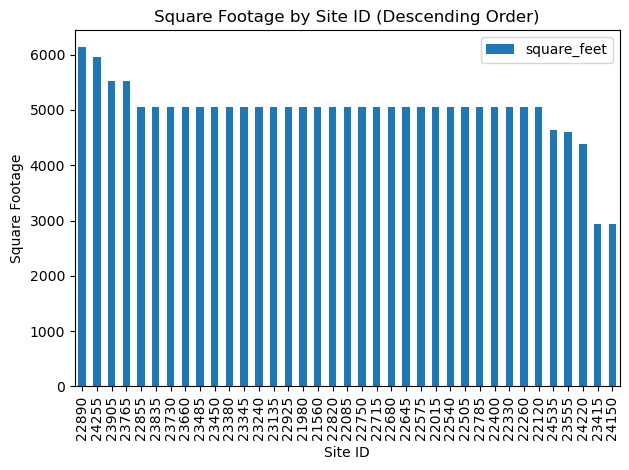

In [47]:
sorted_data = qual_data.sort_values(by='square_feet', ascending=False)
plt.figure(figsize=(12, 10)) 
sorted_data.plot(kind='bar', x='site_id_msba', y='square_feet')
plt.xlabel('Site ID')
plt.ylabel('Square Footage')
plt.title('Square Footage by Site ID (Descending Order)')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

From the previous analysis of time series data and the sales data associated with site IDs, we compared these site IDs with the corresponding square feet data. The analysis indicates that there is no substantial impact of store square feet on average sales.

## Number of Stores by Squarefoot

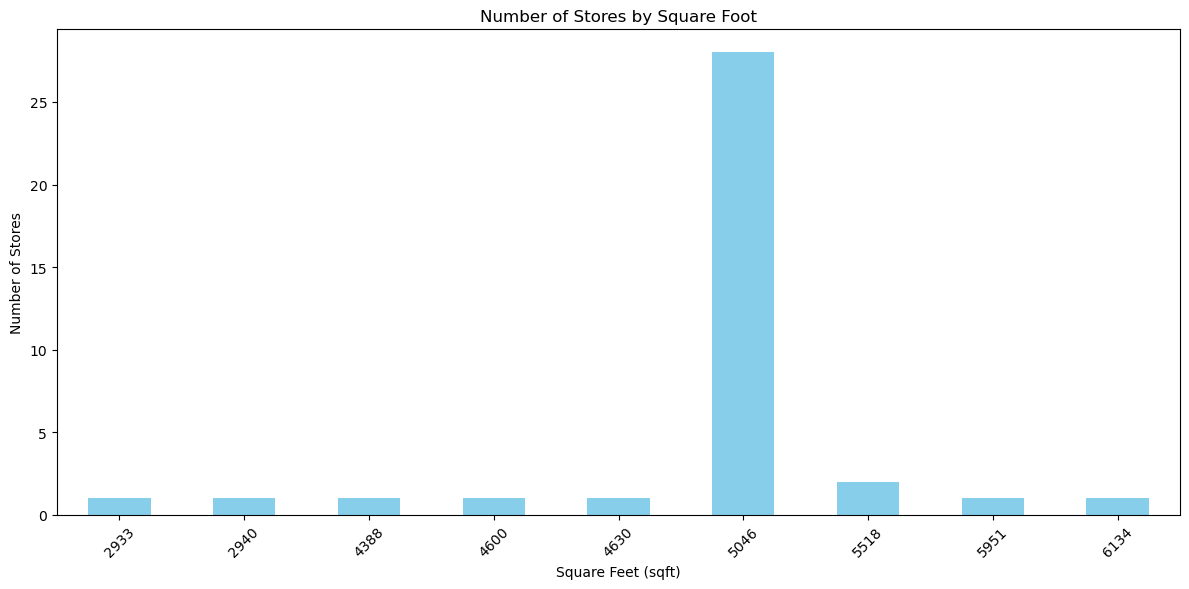

In [48]:
plt.figure(figsize=(12, 6))
store_counts = qual_data['square_feet'].value_counts().sort_index()
store_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Square Feet (sqft)')
plt.ylabel('Number of Stores')
plt.title('Number of Stores by Square Foot')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

From the chart above, it's evident that there is a cluster of more than 25 stores with an approximate square footage of 5,046 square feet. This suggests a commonality in store size among a significant number of locations.

## Comparing diffirent radii population with their incomes 

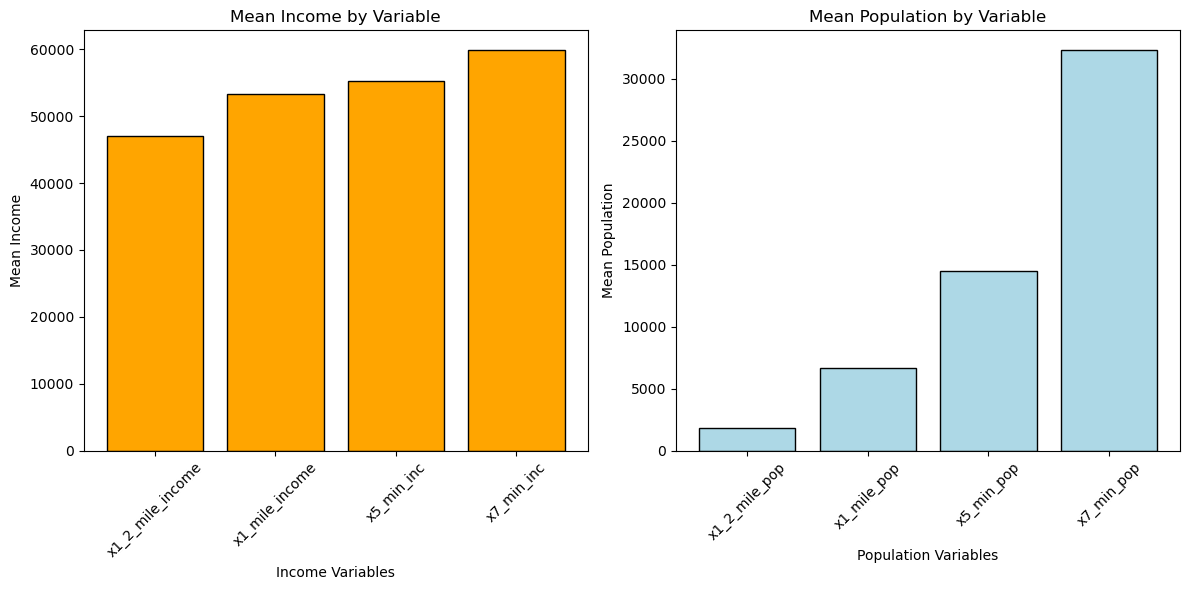

In [49]:
income_columns = ['x1_2_mile_income', 'x1_mile_income', 'x5_min_inc', 'x7_min_inc']
mean_income = qual_data[income_columns].mean()
population_columns = ['x1_2_mile_pop','x1_mile_pop', 'x5_min_pop', 'x7_min_pop']
mean_population = qual_data[population_columns].mean()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(mean_income.index, mean_income, color='orange', edgecolor='k')
axes[0].set_xlabel('Income Variables')
axes[0].set_ylabel('Mean Income')
axes[0].set_title('Mean Income by Variable')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(mean_population.index, mean_population, color='lightblue', edgecolor='k')
axes[1].set_xlabel('Population Variables')
axes[1].set_ylabel('Mean Population')
axes[1].set_title('Mean Population by Variable')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

From the above plot we see that the income increases as the miles for population increases.

## Number of Parking spaces per SiteID

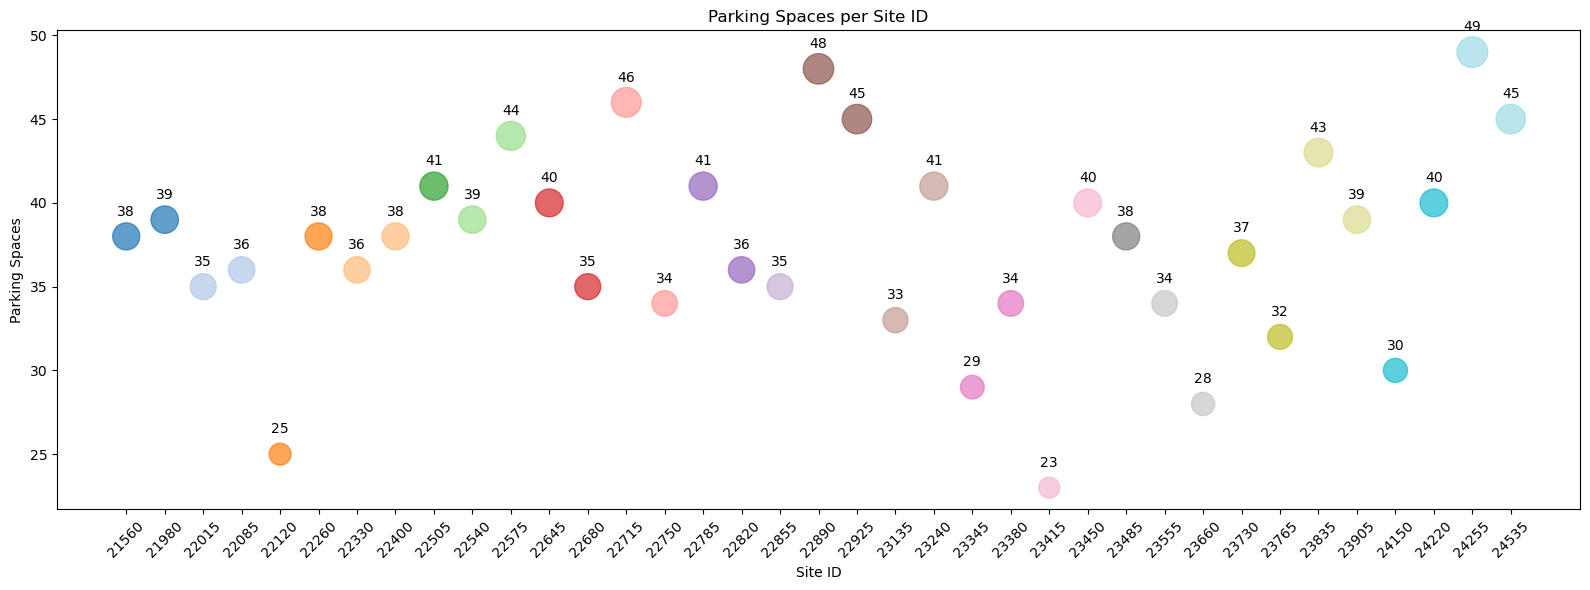

In [50]:
site_parking_spaces = qual_data.groupby('site_id_msba')['parking_spaces'].sum()
x_values = range(len(site_parking_spaces))
colors = plt.cm.tab20(np.linspace(0, 1, len(site_parking_spaces)))
plt.figure(figsize=(16, 6))
plt.scatter(x_values, site_parking_spaces, s=site_parking_spaces * 10, c=colors, alpha=0.7, label='Parking Spaces')
plt.xticks(x_values, site_parking_spaces.index, rotation=45)
for x, spaces in zip(x_values, site_parking_spaces.values):
    plt.annotate(spaces, (x, spaces), textcoords="offset points", xytext=(0, 15), ha='center')
plt.xlabel('Site ID')
plt.ylabel('Parking Spaces')
plt.title('Parking Spaces per Site ID')
plt.tight_layout()
plt.show()

On average, most of the stores have approximately 40 parking spaces. The lowest recorded number of parking spaces is 25 and the maximum number of parking spaces is 49.

# <a name = "MD"> Merged Data </a>

# <a name = "OM"> Overview </a>

In [51]:
mav_sales_data = pd.merge(timeseries_data, qual_data, on='site_id_msba', how='inner')
mav_sales_data.head(10)

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded,...,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
5,2022-06-14,2022-06-30,26,Thursday,NONE,WEEKDAY,2377.8965,878.6750,966.6860,1890.6510,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
6,2022-06-14,2022-07-01,27,Friday,NONE,WEEKDAY,2696.2250,943.3095,894.9325,2202.2665,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
7,2022-06-14,2022-07-04,27,Monday,Independence Day,WEEKDAY,2100.8750,686.1155,539.8400,1337.3815,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
8,2022-06-14,2022-07-06,27,Wednesday,NONE,WEEKDAY,2402.5610,872.0180,994.6825,1993.9115,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
9,2022-06-14,2022-07-08,28,Friday,NONE,WEEKDAY,2777.7190,1004.1465,1231.6675,2461.2700,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2


To enhance our data analysis, we merged the time series dataset with the qualitative dataset using the "site_id". This integration allows us to correlate sales data with various qualitative aspects associated with each store location.

By combining these datasets, we can delve deeper into our analysis. This includes exploring the influence of store characteristics like store size, parking availability, and amenities on sales trends. 

This merged dataset serves as a powerful resource for conducting a wide range of analyses, from identifying key drivers of sales to uncovering patterns and trends that may not have been apparent by examining the individual datasets.

In [52]:
mav_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 67 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   capital_projects.soft_opening_date       13542 non-null  object        
 1   calendar.calendar_day_date               13542 non-null  datetime64[ns]
 2   calendar.fiscal_week_id_for_year         13542 non-null  int64         
 3   calendar.day_of_week                     13542 non-null  object        
 4   calendar_information.holiday             13542 non-null  object        
 5   calendar_information.type_of_day         13542 non-null  object        
 6   daily_yoy_ndt.total_inside_sales         13542 non-null  float64       
 7   daily_yoy_ndt.total_food_service         13542 non-null  float64       
 8   diesel_x                                 13542 non-null  float64       
 9   unleaded                               

In [53]:
mav_sales_data.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded,...,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,...,5,4,Combo,HF/RV,No,Yes,1,1,2,2


# <a name = "EDM"> Exploring the dataset </a>

In [54]:
mav_sales_data.columns

Index(['capital_projects.soft_opening_date', 'calendar.calendar_day_date',
       'calendar.fiscal_week_id_for_year', 'calendar.day_of_week',
       'calendar_information.holiday', 'calendar_information.type_of_day',
       'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service',
       'diesel_x', 'unleaded', 'site_id_msba', 'Year', 'Month', 'quarter',
       'open_year', 'square_feet', 'front_door_count',
       'years_since_last_project', 'parking_spaces', 'lottery', 'freal',
       'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza',
       'ethanol_free', 'diesel_y', 'hi_flow_lanes', 'rv_lanes',
       'hi_flow_rv_lanes', 'def', 'cat_scales', 'car_wash', 'ev_charging',
       'rv_dumps', 'propane', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
       'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop',
       'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc',
       'traditional_forecourt_fueling_positions',
       'traditio

In [55]:
mav_sales_data['capital_projects.soft_opening_date'] = pd.to_datetime(mav_sales_data['capital_projects.soft_opening_date'])
mav_sales_data['calendar.calendar_day_date'] = pd.to_datetime(mav_sales_data['calendar.calendar_day_date'])
print(mav_sales_data.dtypes)

capital_projects.soft_opening_date    datetime64[ns]
calendar.calendar_day_date            datetime64[ns]
calendar.fiscal_week_id_for_year               int64
calendar.day_of_week                          object
calendar_information.holiday                  object
                                           ...      
self_check_out                                object
mens_toilet_count                              int64
mens_urinal_count                              int64
womens_toilet_count                            int64
womens_sink_count                              int64
Length: 67, dtype: object


Coverting the columns 'capital_projects.soft_opening_date' and 'calendar.calendar_day_date' to date_type. This is valuable for tasks like identifying trends over time, grouping data by months or years, and examining the relationship between calendar dates and sales figures.

# <a name = "LM"> Label Encoding </a>

In [56]:
def label_categorical_columns(mav_sales_data):
    label_encoder = LabelEncoder()
    df = mav_sales_data.copy()
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            df[column] = label_encoder.fit_transform(df[column])
    return df
categorical_numeric_df = label_categorical_columns(mav_sales_data)
categorical_numeric_df.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded,...,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count
0,2022-06-14,2022-06-17,25,0,16,0,2168.2920,861.6930,722.7745,1425.1020,...,5,4,0,0,0,0,1,1,2,2
1,2022-06-14,2022-06-22,25,6,16,0,2051.5635,808.0275,730.4850,1436.2740,...,5,4,0,0,0,0,1,1,2,2
2,2022-06-14,2022-06-23,25,4,16,0,2257.5000,966.4410,895.7970,1594.3725,...,5,4,0,0,0,0,1,1,2,2
3,2022-06-14,2022-06-26,26,3,16,1,1520.5925,542.3250,584.2900,1124.9280,...,5,4,0,0,0,0,1,1,2,2
4,2022-06-14,2022-06-27,26,1,16,0,1897.6930,771.4525,852.2605,1640.2540,...,5,4,0,0,0,0,1,1,2,2


The result of label encoding is a dataset where previously categorical columns now consist of numerical labels. These labels maintain the categorical relationship, allowing the analysis to retain the meaning of the original categories while providing the numerical format that the algorithms and statistical tools can process. It's an essential step in the data preprocessing pipeline for tasks that involve machine learning, statistical modeling, and data exploration.

 # <a name = "AIM"> Analysis and Insights </a>

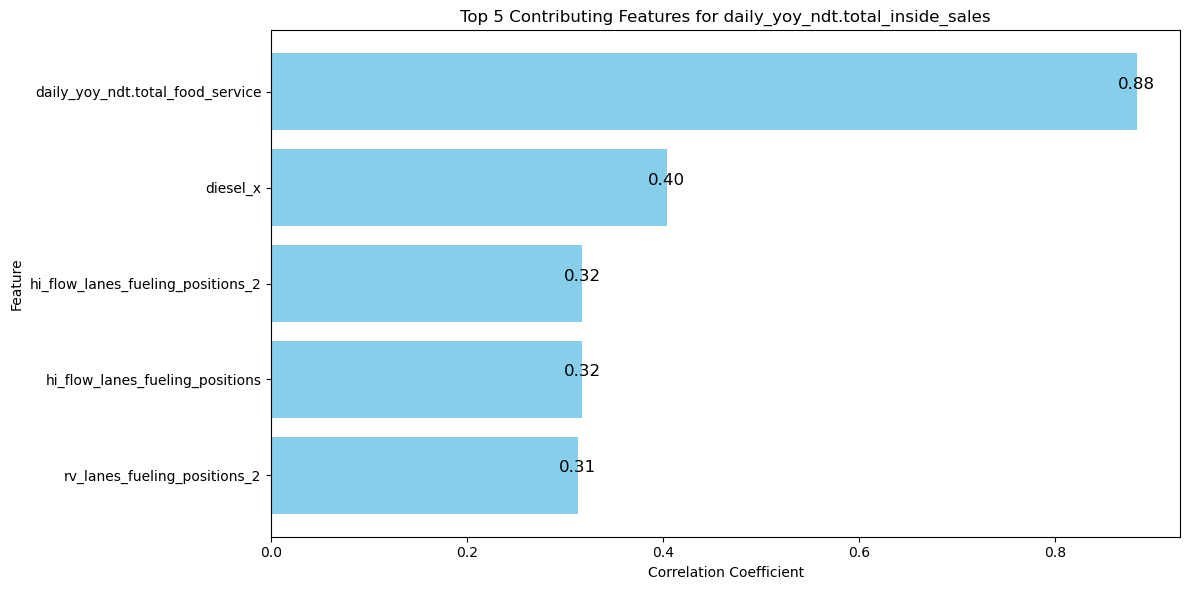

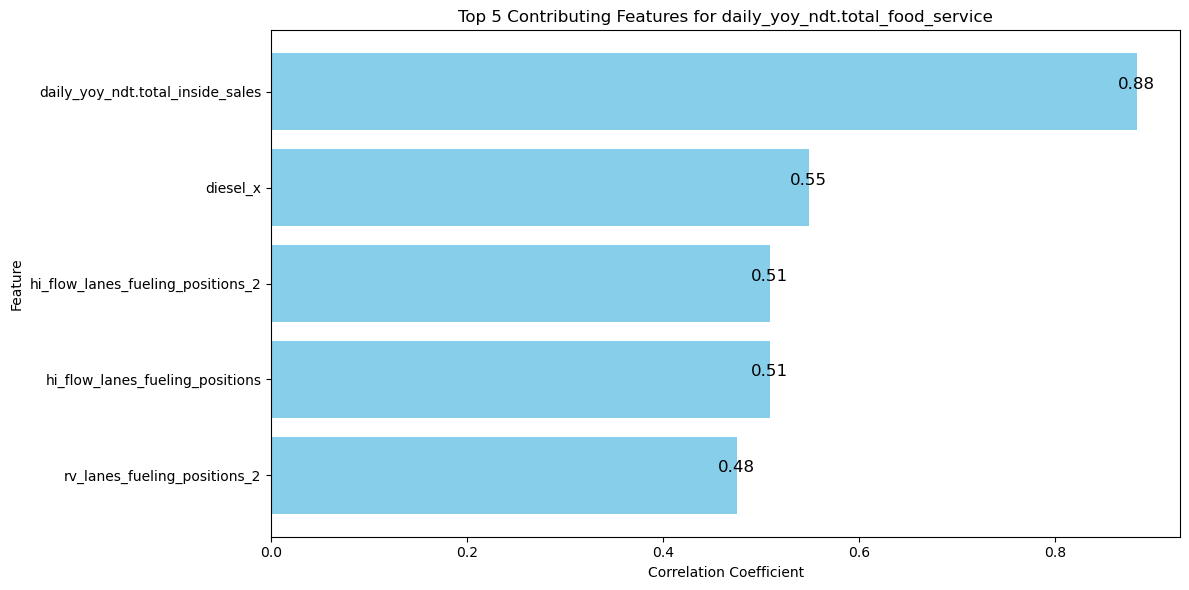

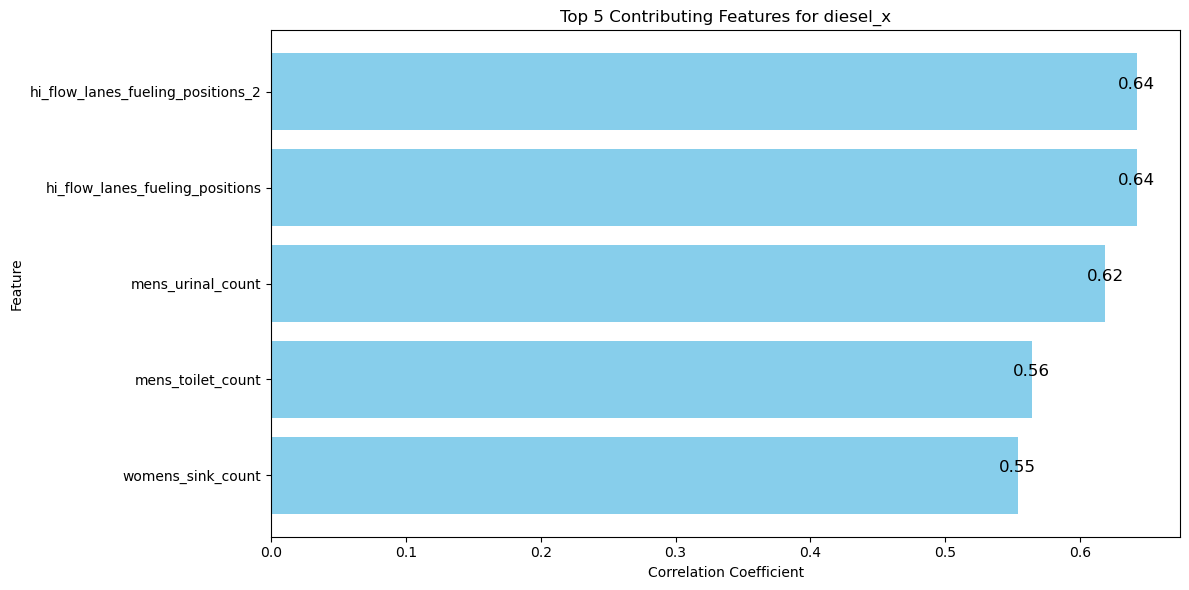

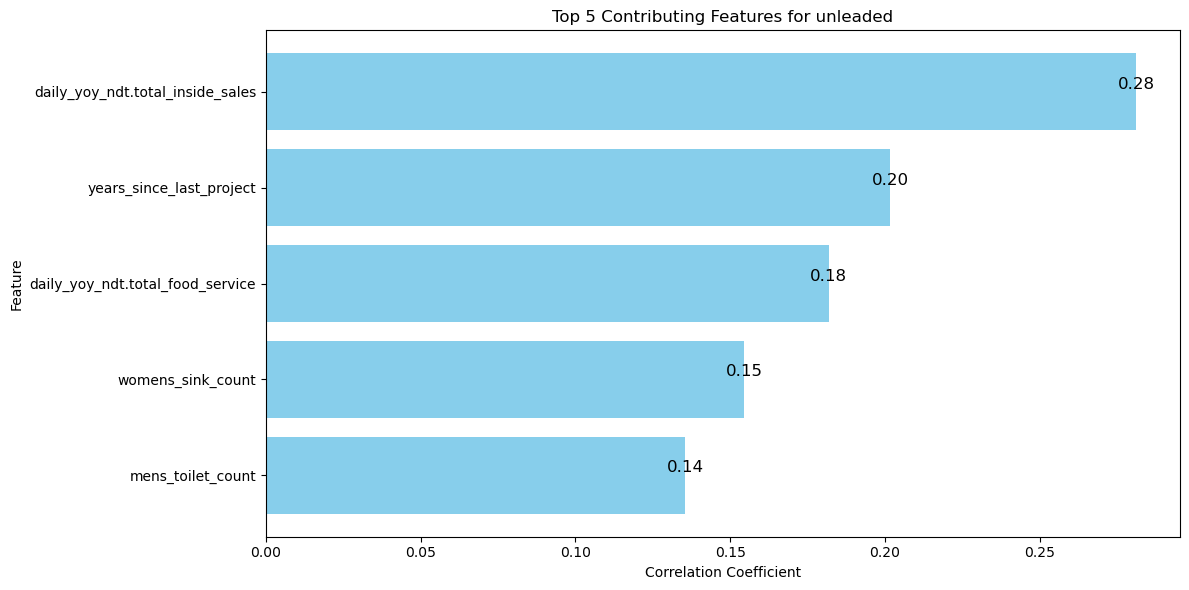

In [57]:
target_vars = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel_x', 'unleaded']
for target_var in target_vars:
    correlations = mav_sales_data.corr()[target_var].sort_values(ascending=False)
    top_5_features = correlations.index[1:6]
    top_5_correlations = correlations.iloc[1:6]
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_5_features, top_5_correlations, color='skyblue')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Feature')
    plt.title(f'Top 5 Contributing Features for {target_var}')
    plt.gca().invert_yaxis() 
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', ha='center',
                 va='bottom', fontsize=12)
    plt.tight_layout()
    plt.show()

The Top 5 contributing factors for inside sales are food sales, diesel, hi_flow_lanes_fueling_positions_2, hi_flow_lanes_fueling_positions and rv_lanes_fueling_positions_2. For food sales, we have inside sales, and all other factors are same.

The top contributing factors for diesel are hi_flow_lanes_fueling_positions_2, hi_flow_lanes_fueling_positions and mens urninal count. Similarly, for unleaded we have inside sales, years_since_last_project, food sales. For both, we have womens_sink_count and mens_toilet_count.

## Sales - Old store vs New Store?

Oldest 5 Store IDs:
13176    21560
12444    22015
12078    22085
7686     22785
10980    22330
Name: site_id_msba, dtype: int64

Newest 5 Store IDs:
3294    23555
732     24220
6588    22890
366     24255
1098    24150
Name: site_id_msba, dtype: int64
Total Diesel Sales for Oldest 5 Store IDs: 1764.9583592896213
Total Diesel Sales for Newest 5 Store IDs: 1561.503410928959
Total Unleaded Sales for Oldest 5 Store IDs: 2240.1211784152983
Total Unleaded Sales for Newest 5 Store IDs: 1961.5486103825128
Total Food Service Sales for Oldest 5 Store IDs: 944.4269907103827
Total Food Service Sales for Newest 5 Store IDs: 704.0942120218584
Total Inside Sales for Oldest 5 Store IDs: 3340.7393622950813
Total Inside Service Sales for Newest 5 Store IDs: 2551.5514213114775


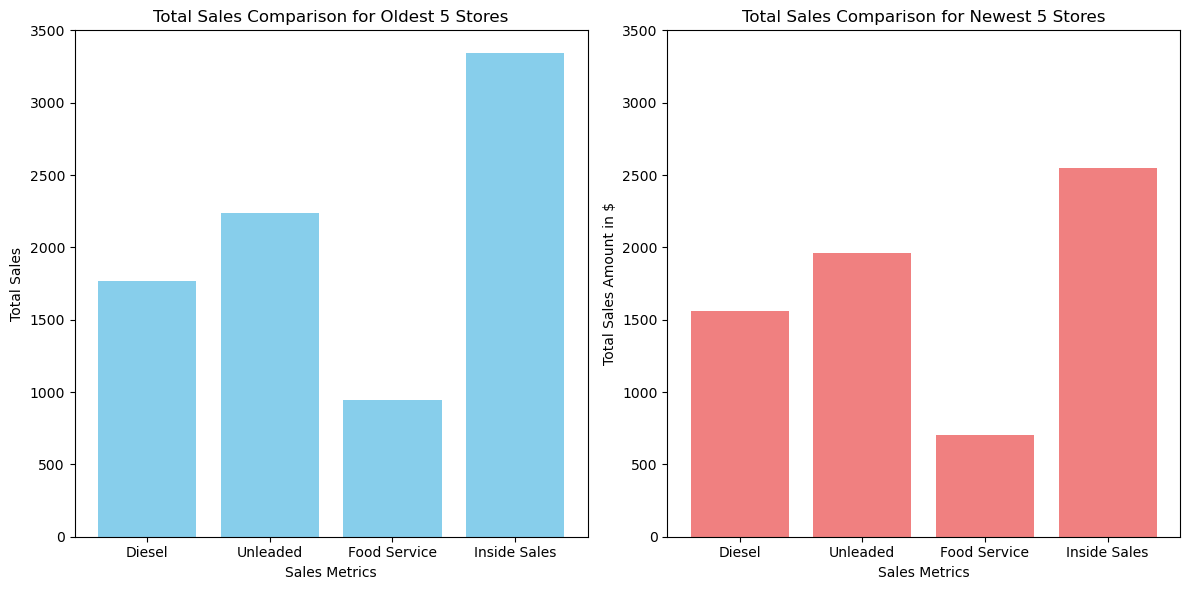

In [58]:
mav_sales_data['capital_projects.soft_opening_date'] = pd.to_datetime(mav_sales_data['capital_projects.soft_opening_date'], errors='coerce')
store_opening_data = mav_sales_data[['site_id_msba', 'capital_projects.soft_opening_date', 'diesel_x', 'unleaded', 'daily_yoy_ndt.total_food_service']]
if 'capital_projects.soft_opening_date' in store_opening_data.columns:
    unique_store_data = store_opening_data.drop_duplicates(subset=['site_id_msba'])
    sorted_data = unique_store_data.sort_values(by='capital_projects.soft_opening_date')
    oldest_store_ids = sorted_data['site_id_msba'].head(5)
    newest_store_ids = sorted_data['site_id_msba'].tail(5)
    print("Oldest 5 Store IDs:")
    print(oldest_store_ids)
    print("\nNewest 5 Store IDs:")
    print(newest_store_ids)
    oldest_store_sales = mav_sales_data[mav_sales_data['site_id_msba'].isin(oldest_store_ids)]
    newest_store_sales = mav_sales_data[mav_sales_data['site_id_msba'].isin(newest_store_ids)]
    total_sales_oldest_diesel = oldest_store_sales['diesel_x'].mean()
    total_sales_newest_diesel = newest_store_sales['diesel_x'].mean()
    total_sales_oldest_unleaded = oldest_store_sales['unleaded'].mean()
    total_sales_newest_unleaded = newest_store_sales['unleaded'].mean()
    total_sales_oldest_food_service = oldest_store_sales['daily_yoy_ndt.total_food_service'].mean()
    total_sales_newest_food_service = newest_store_sales['daily_yoy_ndt.total_food_service'].mean()
    total_sales_oldest_inside_sales = oldest_store_sales['daily_yoy_ndt.total_inside_sales'].mean()
    total_sales_newest_inside_sales = newest_store_sales['daily_yoy_ndt.total_inside_sales'].mean()
    print("Total Diesel Sales for Oldest 5 Store IDs:", total_sales_oldest_diesel)
    print("Total Diesel Sales for Newest 5 Store IDs:", total_sales_newest_diesel)
    print("Total Unleaded Sales for Oldest 5 Store IDs:", total_sales_oldest_unleaded)
    print("Total Unleaded Sales for Newest 5 Store IDs:", total_sales_newest_unleaded)
    print("Total Food Service Sales for Oldest 5 Store IDs:", total_sales_oldest_food_service)
    print("Total Food Service Sales for Newest 5 Store IDs:", total_sales_newest_food_service)
    print("Total Inside Sales for Oldest 5 Store IDs:", total_sales_oldest_inside_sales)
    print("Total Inside Service Sales for Newest 5 Store IDs:", total_sales_newest_inside_sales)
    metrics = ['Diesel', 'Unleaded', 'Food Service', 'Inside Sales']
    total_sales_oldest = [total_sales_oldest_diesel, total_sales_oldest_unleaded, total_sales_oldest_food_service, total_sales_oldest_inside_sales]
    total_sales_newest = [total_sales_newest_diesel, total_sales_newest_unleaded, total_sales_newest_food_service, total_sales_newest_inside_sales]
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(metrics, total_sales_oldest, color='skyblue')
    plt.xlabel('Sales Metrics')
    plt.ylabel('Total Sales')
    plt.title('Total Sales Comparison for Oldest 5 Stores')
    plt.ylim(0, 3500)  
    plt.subplot(1, 2, 2)
    plt.bar(metrics, total_sales_newest, color='lightcoral')
    plt.xlabel('Sales Metrics')
    plt.ylabel('Total Sales Amount in $')
    plt.title('Total Sales Comparison for Newest 5 Stores')
    plt.ylim(0, 3500) 
    plt.tight_layout()
    plt.show()
else:
    print("Column 'capital_projects.soft_opening_date' not found in DataFrame.")

The chart provides a clear visual representation of the sales performance difference between older and newer stores. Older stores, which have been established for a longer time, consistently outperform newer stores in terms of sales. This observation holds true for all the target variables analyzed.

However, the most notable difference appears in the case of inside sales. When comparing the sales data for older stores to newer stores, inside sales experienced a substantial drop of approximately 25%.

Where as, for the other target variables, such as food sales, diesel, unleaded the drop in sales from older to newer stores is relatively consistent, averaging around 11%. This indicates that while there is a decrease in sales across the board for newer stores, the decline is not as dramatic as it is for inside sales.

## Income VS Sales

Text(0, 0.5, 'Sales (Gallons)')

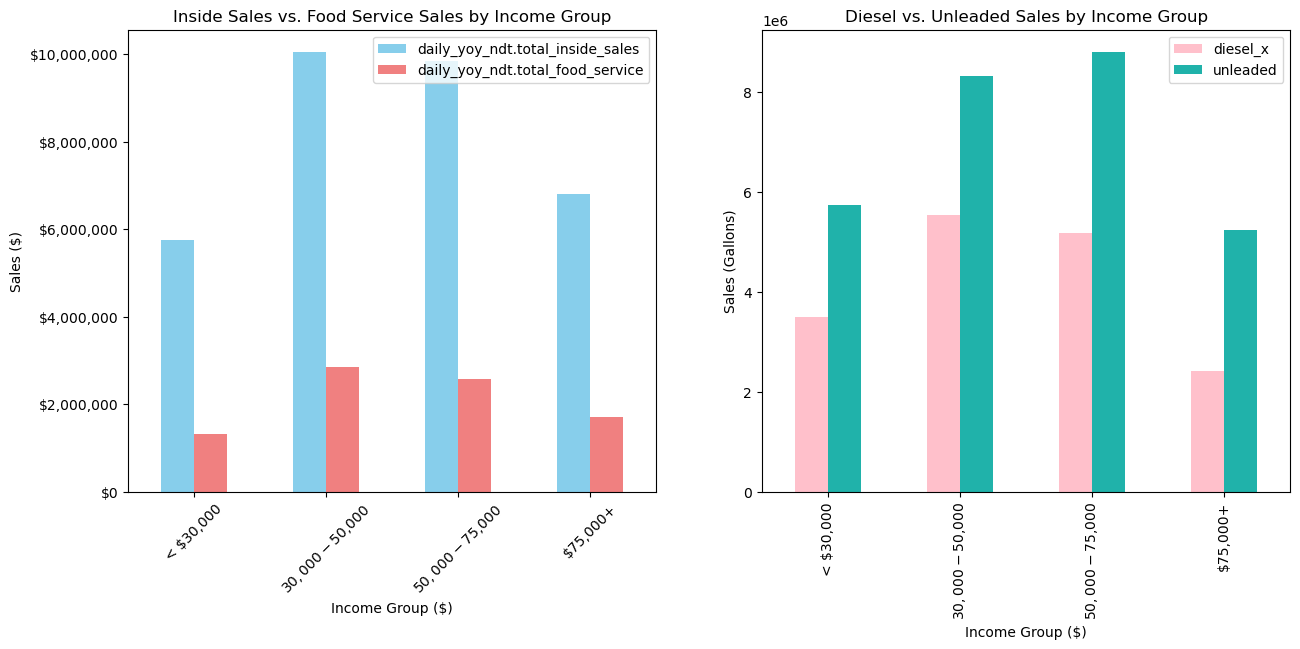

In [59]:
income_bins = [0, 30000, 50000, 75000, np.inf]
income_labels = ["< $30,000", "$30,000 - $50,000", "$50,000 - $75,000", "$75,000+"]
mav_sales_data['Income Group'] = pd.cut(mav_sales_data['x1_2_mile_income'], bins=income_bins, labels=income_labels)
income_sales = mav_sales_data.groupby('Income Group')[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel_x', 'unleaded']].sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
income_sales[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Inside Sales vs. Food Service Sales by Income Group')
ax1.set_xlabel('Income Group ($)')
ax1.set_ylabel('Sales ($)')
ax1.set_xticklabels(income_labels, rotation=45)
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x):,}'))
bar_colors = ['pink', 'lightseagreen']
income_sales[['diesel_x', 'unleaded']].plot(kind='bar', ax=ax2, color=bar_colors)
ax2.set_title('Diesel vs. Unleaded Sales by Income Group')
ax2.set_xlabel('Income Group ($)')
ax2.set_ylabel('Sales (Gallons)')

The analysis indicates distinct consumer spending patterns based on income groups. People living within a half-mile radius tend to allocate a larger portion of their expenses to inside sales and unleaded fuel. In contrast, the 50k-75k income bracket exhibits a higher expenditure on unleaded fuel compared to the over-75k group. Regarding diesel, the 50k-75k income category displays a more substantial spending pattern compared to the over-75k group. Notably, individuals traveling a distance of two miles tend to allocate a smaller portion of their budget to food purchases.

Text(0, 0.5, 'Sales (Gallons)')

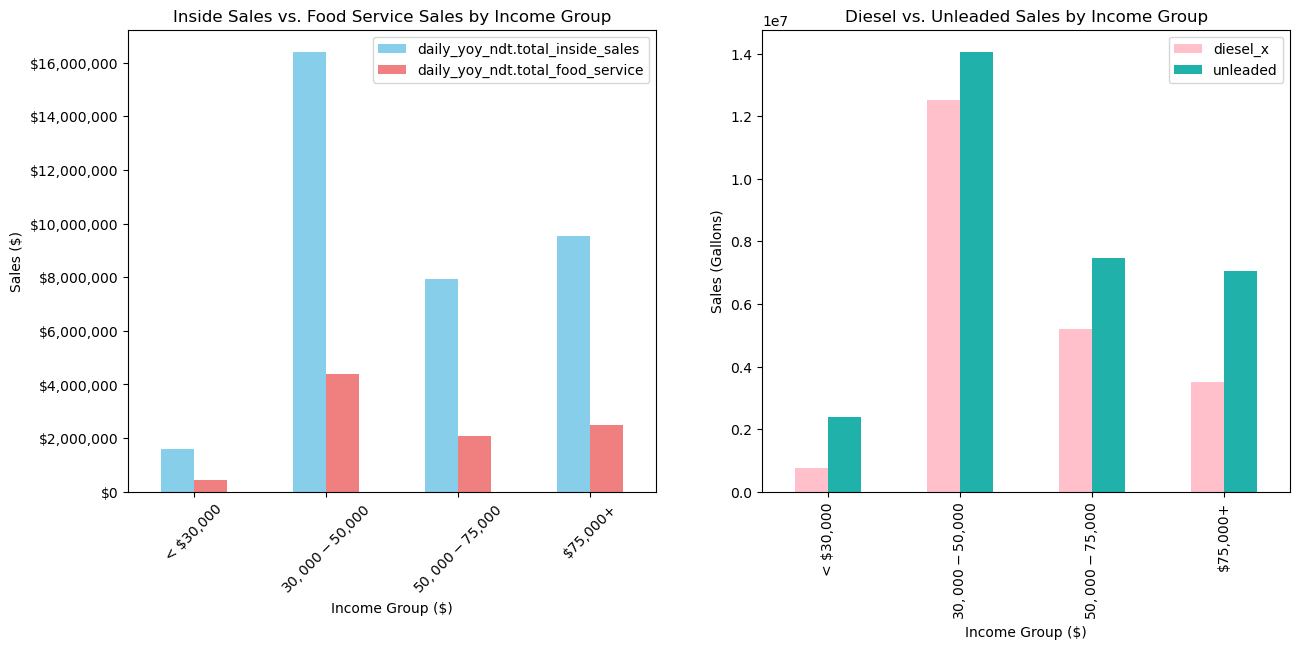

In [60]:
income_bins = [0, 30000, 50000, 75000, np.inf]
income_labels = ["< $30,000", "$30,000 - $50,000", "$50,000 - $75,000", "$75,000+"]
mav_sales_data['Income Group'] = pd.cut(mav_sales_data['x1_mile_income'], bins=income_bins, labels=income_labels)
income_sales = mav_sales_data.groupby('Income Group')[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel_x', 'unleaded']].sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
income_sales[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Inside Sales vs. Food Service Sales by Income Group')
ax1.set_xlabel('Income Group ($)')
ax1.set_ylabel('Sales ($)')
ax1.set_xticklabels(income_labels, rotation=45)
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x):,}'))
bar_colors = ['pink', 'lightseagreen']
income_sales[['diesel_x', 'unleaded']].plot(kind='bar', ax=ax2, color=bar_colors)
ax2.set_title('Diesel vs. Unleaded Sales by Income Group')
ax2.set_xlabel('Income Group ($)')
ax2.set_ylabel('Sales (Gallons)')

The analysis from the two charts indicates that the 30k-50k income group plays a significant role in purchasing various products. This income group leads in the consumption of inside sales, food products, diesel, and unleaded fuel. Surprisingly, even those with higher incomes (75k+) tend to purchase fewer food products. Conversely, individuals with incomes less than 30k are among the least consumers.

# <a name = "R"> Results </a>

#### Below is summary of the all exloratory data analysis findings:

Strong positive correlations between inside sales and food sales suggest that customers buying in-store items are also likely to purchase food. Diesel and food sales exhibit a notable positive correlation, indicating increased diesel sales are associated with higher food sales.

Seasonal trends reveal inside sales peaking in early months, gradually declining in the latter half of the year. Food sales generally increase throughout the year, with peaks in the middle of the year, followed by declines. Both inside and food sales show a shared pattern of declining sales from September to year-end.

Diesel sales experience fluctuations, with significant drops in October and a notable spike from May to June. Both diesel and unleaded sales consistently decline from September to year-end, but 2022 and 2023 show overall growth.

Inside sales consistently generate the highest revenue in Food Category and unleaded fuel generates the highest revenue in fuel type.

Quarter-wise analysis highlights Q2 and Q3 as peak sales periods for inside and food sales. 2023 shows positive sales trends throughout the year.

Inside sales exhibit monthly growth from January to March, peaking in June and July. Food sales peak in March and gradually decrease from September. Diesel sales increase in Q1, with minor dips in February and May. Unleaded sales show a consistent monthly upward trajectory, with October recording the highest sales.

Across the three-year span from 2021 to 2023, a consistent trend is evident in all four graphs: the highest sales volumes consistently occur on weekdays, with weekends registering comparatively lower sales figures

Fridays consistently record the highest sales, except for Diesel where Wednesdays lead. The 1st of each month tends to have high sales, while the last week of December consistently records the lowest.

Holiday analysis reveals that Ascension day and Good Friday result in the highest average inside sales, with New Year's having the lowest. For food sales, Ascension day, Good Friday while New Year's Eve has the lowest. Good Friday and Flag day consistently yield the highest average sales for unleaded and diesel fuels.

Income group analysis shows the 30k-50k bracket dominating sales across categories.

In conclusion, target variables are influenced by a range of factors. Thic can leverage the insights to refine our models for further analysis.